In [311]:
import keyring
from pprint import pprint

api_key_irp = keyring.get_password("irp_api_key", "birdblues")
api_secret_irp = keyring.get_password("irp_api_secret", "birdblues")

api_key_isa = keyring.get_password("isa_api_key", "birdblues")
api_secret_isa = keyring.get_password("isa_api_secret", "birdblues")

api_key_0 = keyring.get_password("api_key_0", "birdblues")
api_secret_0 = keyring.get_password("api_secret_0","birdblues")

api_key_1 = keyring.get_password("api_key_1", "birdblues")
api_secret_1 = keyring.get_password("api_secret_1","birdblues")

api_key_2 = keyring.get_password("api_key_2", "birdblues")
api_secret_2 = keyring.get_password("api_secret_2","birdblues")

# print(f"api_key_irp = {api_key_irp}")
# print(f"api_secret_irp = {api_secret_irp}")
# print(f"api_key_isa = {api_key_isa}")
# print(f"api_secret_isa = {api_secret_isa}")
# print(f"api_key_0 = {api_key_0}")
# print(f"api_secret_0 = {api_secret_0}")
# print(f"api_key_1 = {api_key_1}")
# print(f"api_secret_1 = {api_secret_1}")
# print(f"api_key_2 = {api_key_2}")
# print(f"api_secret_2 = {api_secret_2}")

In [312]:
acc_no_0 = "63981494-01" # 위탁
acc_no_1 = "64267316-22" # 연금저축 1
acc_no_2 = "64012548-22" # 연금저축 2
acc_no_isa = "64043278-01" # ISA
acc_no_irp = "64012548-29" # IRP

In [313]:
import keyring

token_0 = keyring.get_password("access_token_0", "birdblues")
token_1 = keyring.get_password("access_token_1", "birdblues")
token_2 = keyring.get_password("access_token_2", "birdblues")
token_3 = keyring.get_password("access_token_3", "birdblues")
token_4 = keyring.get_password("access_token_4", "birdblues")

# print(f"token_0 = {token_0}")
# print(f"token_1 = {token_1}")
# print(f"token_2 = {token_2}")
# print(f"token_3 = {token_3}")
# print(f"token_4 = {token_4}")

In [314]:
import matplotlib.pyplot as plt
import pandas as pd

def show_pie(data, label, title, legend):
    # 파이 그래프 생성
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=label, autopct='%1.1f', startangle=90)
    plt.title(title)
    plt.legend(legend, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

In [315]:
import requests
import json

def get_balance(access_token, app_key, app_secret, acc_no):
    
    url_base = "https://openapi.koreainvestment.com:9443"
    path = "/uapi/domestic-stock/v1/trading/inquire-balance"
    url = f"{url_base}/{path}"

    headers = {
        "Content-Type": "application/json; charset=utf-8",
        "authorization": f"Bearer {access_token}",
        "appKey": app_key,
        "appSecret": app_secret,
        "tr_id": "TTTC8434R"
    }

    params = {
        "CANO": acc_no[:8],  # 계좌번호 앞 8지리
        "ACNT_PRDT_CD": acc_no[-2:],  # 계좌번호 뒤 2자리
        "AFHR_FLPR_YN": "N",  # 시간외단일가여부
        "OFL_YN": "",  # 공란
        "INQR_DVSN": "01",  # 조회구분
        "UNPR_DVSN": "01",  # 단가구분
        "FUND_STTL_ICLD_YN": "N",  # 펀드결제분포함여부
        "FNCG_AMT_AUTO_RDPT_YN": "N",  # 융자금액자동상환여부        
        "PRCS_DVSN": "00",  # 처리구분(00: 전일매매포함)
        "CTX_AREA_FK100": "",  # 연속조회검색조건
        "CTX_AREA_NK100": ""  # 연속조회키
    }
    res = requests.get(url, headers=headers, params=params)
    return res.json()
    

In [316]:
def get_balance_irp(access_token, app_key, app_secret, acc_no):
    
    url_base = "https://openapi.koreainvestment.com:9443"
    path = "/uapi/domestic-stock/v1/trading/pension/inquire-balance"
    url = f"{url_base}/{path}"

    headers = {
        "Content-Type": "application/json; charset=utf-8",
        "authorization": f"Bearer {access_token}",
        "appKey": app_key,
        "appSecret": app_secret,
        "tr_id": "TTTC2208R"
    }

    params = {
        "CANO": acc_no[:8],  # 계좌번호 앞 8지리
        "ACNT_PRDT_CD": acc_no[-2:],  # 계좌번호 뒤 2자리
        "ACCA_DVSN_CD":"00",
        "INQR_DVSN":"00",
        "CTX_AREA_FK100": "",  # 연속조회검색조건
        "CTX_AREA_NK100": ""  # 연속조회키
    }
    res = requests.get(url, headers=headers, params=params)
    return res.json()

In [317]:
json_0 = get_balance(token_0, api_key_0, api_secret_0, acc_no_0)
json_1 = get_balance(token_1, api_key_1, api_secret_1, acc_no_1)
json_2 = get_balance(token_2, api_key_2, api_secret_2, acc_no_2)
json_3 = get_balance(token_3, api_key_isa, api_secret_isa, acc_no_isa)
json_4 = get_balance_irp(token_4, api_key_irp, api_secret_irp, acc_no_irp)

In [318]:
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format

def get_balance_json(json):
    cash = json['output2'][0]['prvs_rcdl_excc_amt']
    ap = pd.DataFrame.from_records(json['output1'])
    if(ap.size > 0):
        ap = ap[["pdno", "prdt_name", "evlu_amt", "prpr", "hldg_qty", "pchs_amt", "pchs_avg_pric", "evlu_pfls_rt"]]
        ap.columns = ["코드", "이름", "평가금액", "단가", "수량", "매입금액", "매입단가", "수익률"]
        new_row = {"코드": "0", "이름": "현금", "평가금액": cash, "단가": 1, "수량": cash, "매입금액": cash, "매입단가": 1, "수익률": 0}
        new_row_df = pd.DataFrame([new_row])

        # concat을 사용하여 새로운 행 추가
        ap = pd.concat([ap, new_row_df], ignore_index=True)
        
        # 데이터 타입 변환
        ap["평가금액"] = pd.to_numeric(ap["평가금액"], errors='coerce')
        ap["매입금액"] = pd.to_numeric(ap["매입금액"], errors='coerce')
        ap["단가"] = pd.to_numeric(ap["단가"], errors='coerce')
        ap["매입단가"] = pd.to_numeric(ap["매입단가"], errors='coerce')
        ap["수량"] = pd.to_numeric(ap["수량"], errors='coerce')
        ap["수익률"] = pd.to_numeric(ap["수익률"], errors='coerce')
        ap["계좌"] = json['ctx_area_fk100'][:8] + '-' + json['ctx_area_fk100'][9:11]
    return ap

In [319]:
import pandas as pd


def get_balance_json_irp(json):
    cash = json['output2']['prvs_rcdl_excc_amt']
    ap = pd.DataFrame.from_records(json['output1'])
    if(ap.size > 0):
        ap = ap[["pdno", "prdt_name", "evlu_amt", "prpr", "hldg_qty", "pchs_amt", "pchs_avg_pric", "evlu_erng_rt"]]
        ap.columns = ["코드", "이름", "평가금액", "단가", "수량", "매입금액", "매입단가", "수익률"]
        new_row = {"코드": "0", "이름": "현금", "평가금액": cash, "단가": 1, "수량": cash, "매입금액": cash, "매입단가": 1, "수익률": 0}
        new_row_df = pd.DataFrame([new_row])

        # concat을 사용하여 새로운 행 추가
        ap = pd.concat([ap, new_row_df], ignore_index=True)

        # 데이터 타입 변환
        ap["평가금액"] = pd.to_numeric(ap["평가금액"], errors='coerce')
        ap["매입금액"] = pd.to_numeric(ap["매입금액"], errors='coerce')
        ap["단가"] = pd.to_numeric(ap["단가"], errors='coerce')
        ap["매입단가"] = pd.to_numeric(ap["매입단가"], errors='coerce')
        ap["수량"] = pd.to_numeric(ap["수량"], errors='coerce')
        ap["수익률"] = pd.to_numeric(ap["수익률"], errors='coerce')
        ap["계좌"] = json['ctx_area_fk100'][:8] + '-' + json['ctx_area_fk100'][9:11]
    return ap

In [320]:
df_0 = get_balance_json(json_0)
df_1 = get_balance_json(json_1)
df_2 = get_balance_json(json_2)
df_3 = get_balance_json(json_3)
df_4 = get_balance_json_irp(json_4)
df = pd.concat([df_0, df_1, df_2, df_3, df_4], ignore_index=True)
df_frison = pd.concat([df_1, df_4], ignore_index=True)
# df_0 = df_0.sort_values(by='이름')
df_1 = df_1.sort_values(by='이름')
df_2 = df_2.sort_values(by='이름')
df_3 = df_3.sort_values(by='이름')
df_4 = df_4.sort_values(by='이름')

total_1 = df_1["평가금액"].sum()
total_2 = df_2["평가금액"].sum()
total_3 = df_3["평가금액"].sum()
total_4 = df_4["평가금액"].sum()

,코드,이름,평가금액,단가,수량,매입금액,매입단가,수익률,계좌,비중
7,411060,ACE KRX금현물,5381775,17085,315,5189063,16473.22,3.71,64267316-22,10.42
6,365780,ACE 국고채10년,4326530,94055,46,4213150,91590.22,2.69,64267316-22,8.38
5,360200,ACE 미국S&P500,5171950,21110,245,5112805,20868.59,1.15,64267316-22,10.02
8,456880,ACE 미국달러SOFR금리(합성),11106500,11450,970,11083775,11426.57,0.20,64267316-22,21.51
3,308620,KODEX 미국10년국채선물,4937480,11645,424,4875895,11499.75,1.26,64267316-22,9.56
1,283580,KODEX 차이나CSI300,1853250,12355,150,1893955,12626.37,-2.14,64267316-22,3.59
2,294400,KOSEF 200TR,2120580,41580,51,2093100,41041.18,1.31,64267316-22,4.11
9,473330,SOL 미국30년국채커버드콜(합성),2989840,9835,304,2968305,9764.16,0.72,64267316-22,5.79
4,357870,TIGER CD금리투자KIS(합성),12449250,55330,225,12433500,55260.00,0.12,64267316-22,24.11
0,241180,TIGER 일본니케이225,1284900,21415,60,1259700,20995.00,2.00,64267316-22,2.49


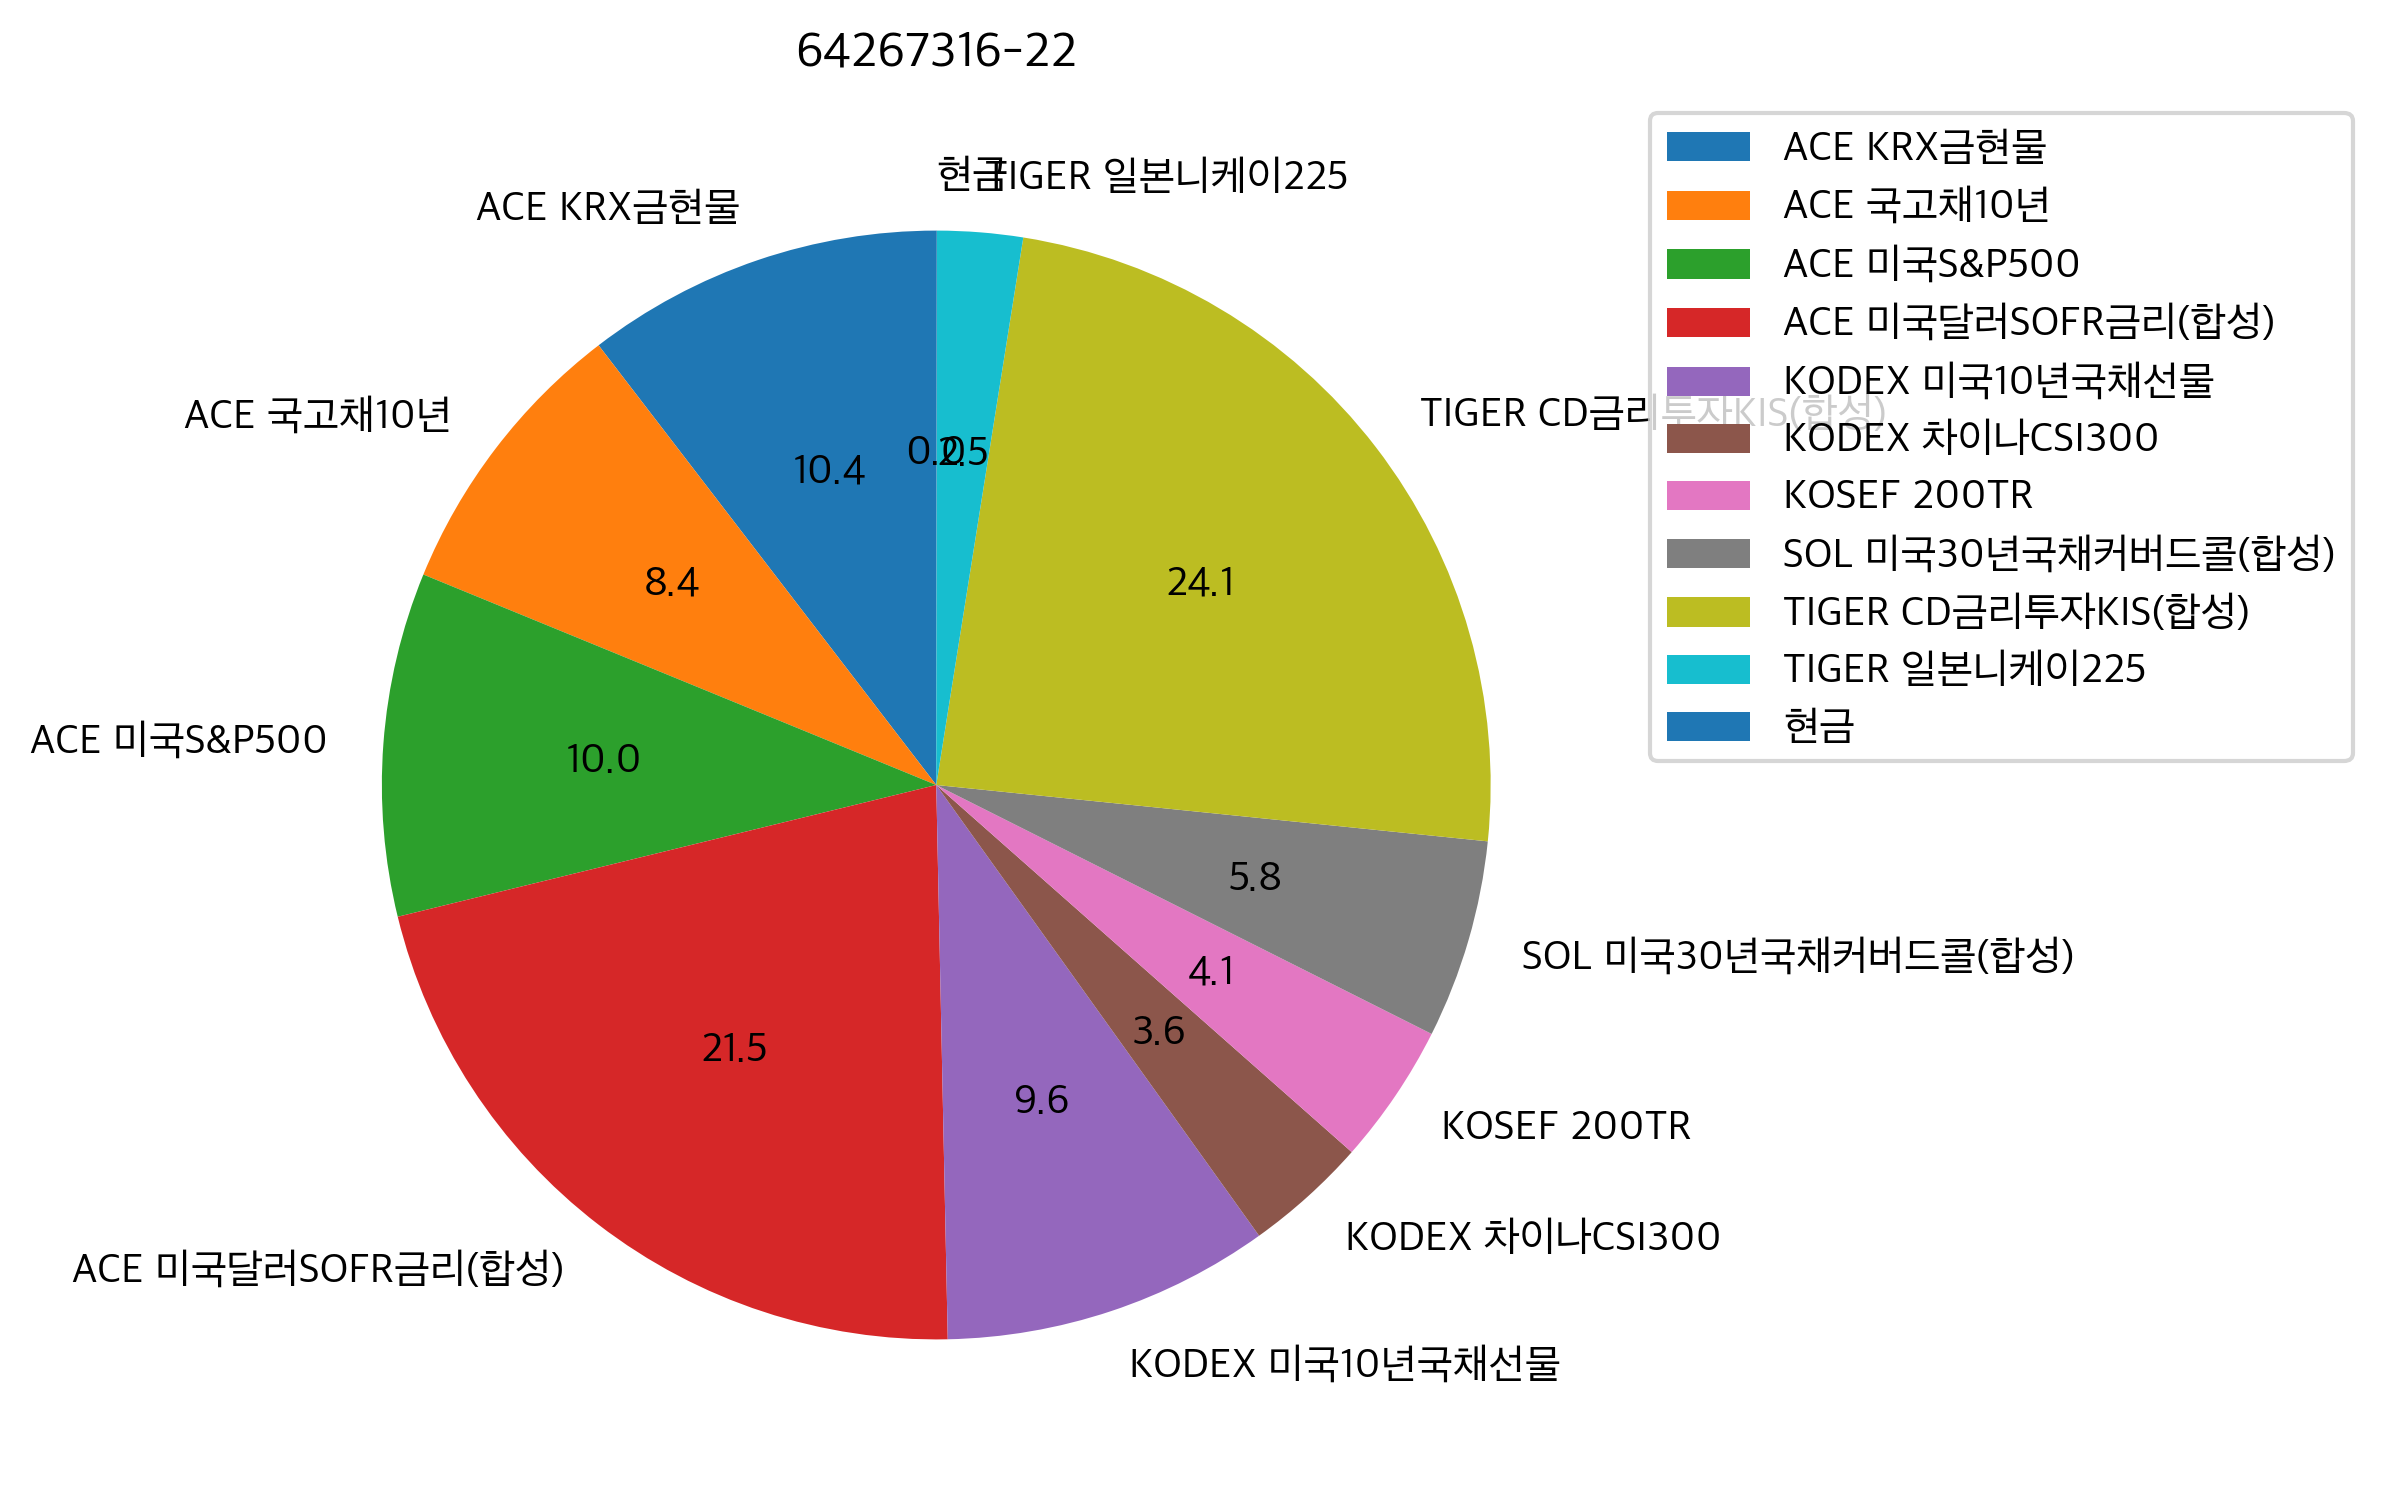

In [321]:
df_1["비중"] = df_1["평가금액"] / total_1 * 100
display(df_1)
show_pie(df_1["평가금액"], df_1["이름"], acc_no_1, df_1["이름"])

In [322]:
total_1

51632909

,코드,이름,평가금액,단가,수량,매입금액,매입단가,수익률,계좌,비중
2,411060,ACE KRX금현물,5774730,17085,338,5416210,16024.29,6.61,64012548-22,40.57
1,360200,ACE 미국S&P500,3272050,21110,155,2825275,18227.58,15.81,64012548-22,22.99
4,456880,ACE 미국달러SOFR금리(합성),1866350,11450,163,1866255,11449.42,0.00,64012548-22,13.11
0,218420,KODEX 미국S&P500에너지(합성),769500,15390,50,654832,13096.64,17.51,64012548-22,5.41
5,473330,SOL 미국30년국채커버드콜(합성),2547265,9835,259,2536490,9793.40,0.42,64012548-22,17.89
3,449170,TIGER KOFR금리액티브(합성),0,107330,0,0,0.00,0.00,64012548-22,0.00
6,0,현금,5652,1,5652,5652,1.00,0.00,64012548-22,0.04


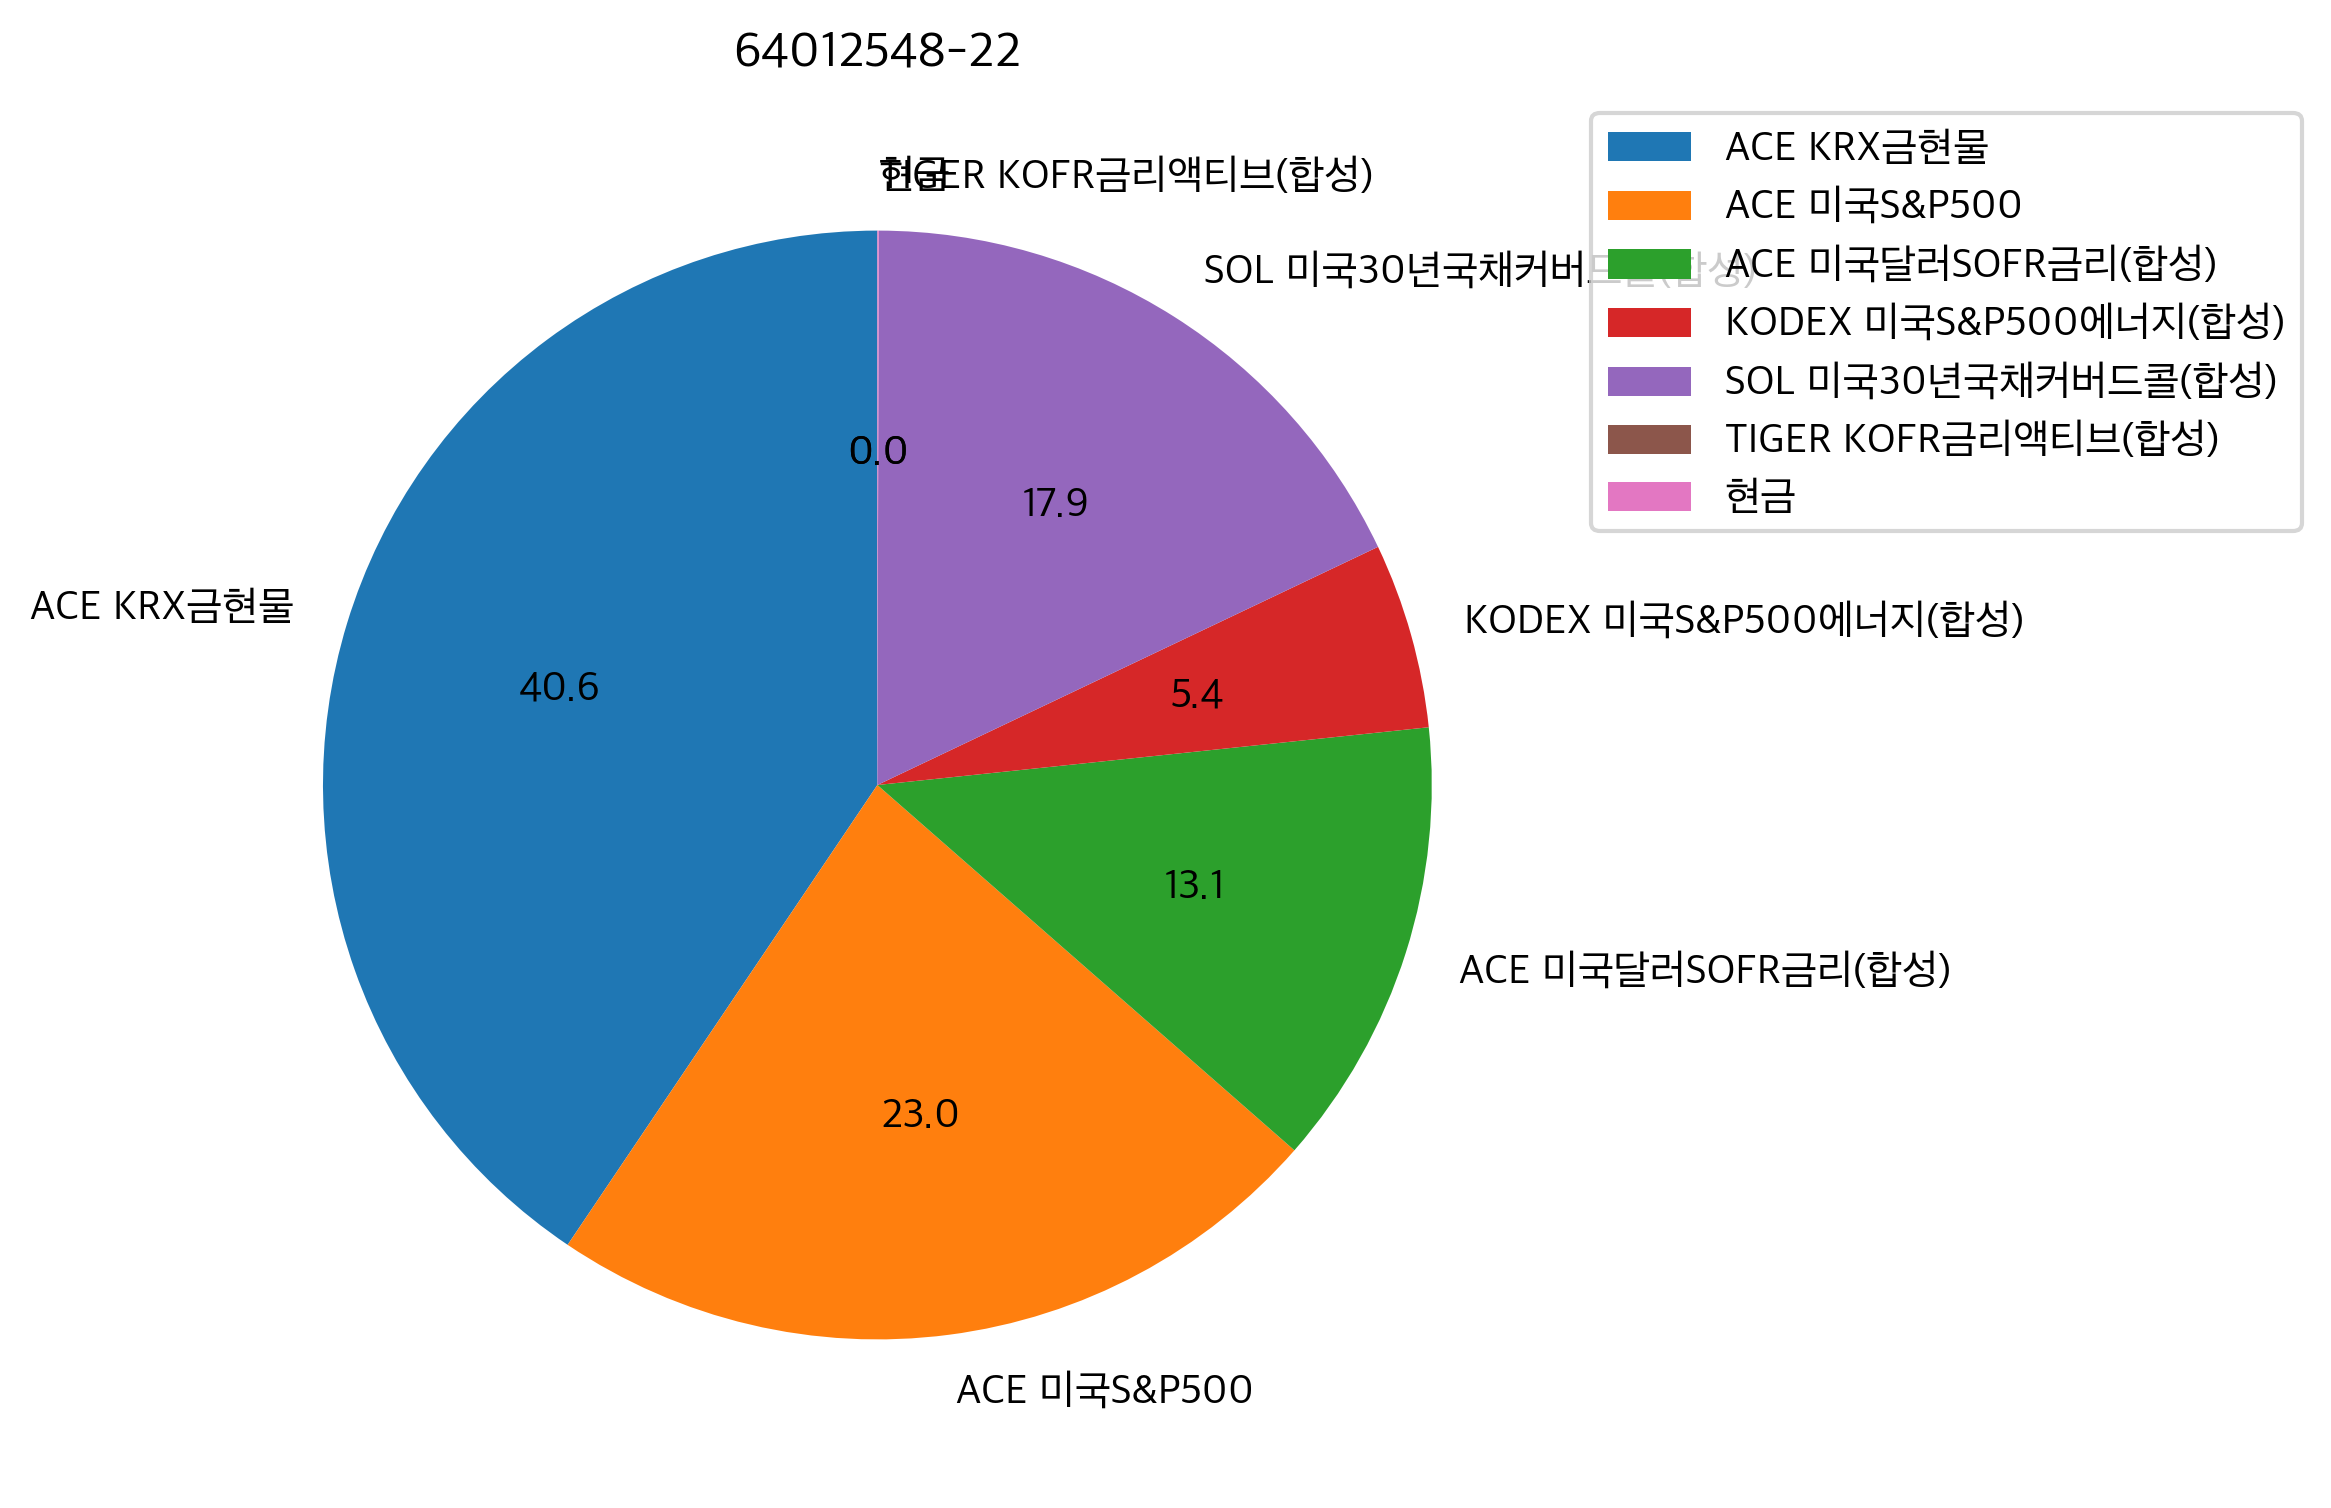

In [323]:
df_2["비중"] = df_2["평가금액"] / df_2["평가금액"].sum() * 100
display(df_2)
show_pie(df_2["평가금액"], df_2["이름"], acc_no_2, df_2["이름"])

In [324]:
total_2

14235547

,코드,이름,평가금액,단가,수량,매입금액,매입단가,수익률,계좌,비중
2,411060,ACE KRX금현물,2562750,17085,150,2440235,16268.23,5.02,64043278-01,19.20
3,473330,SOL 미국30년국채커버드콜(합성),1583435,9835,161,1580303,9815.55,0.19,64043278-01,11.86
0,261120,TIGER 미국달러선물인버스2X,0,5665,0,0,0.00,0.00,64043278-01,0.00
1,292560,TIGER 일본엔선물,9174810,8805,1042,8991845,8629.41,2.03,64043278-01,68.75
4,0,현금,25110,1,25110,25110,1.00,0.00,64043278-01,0.19


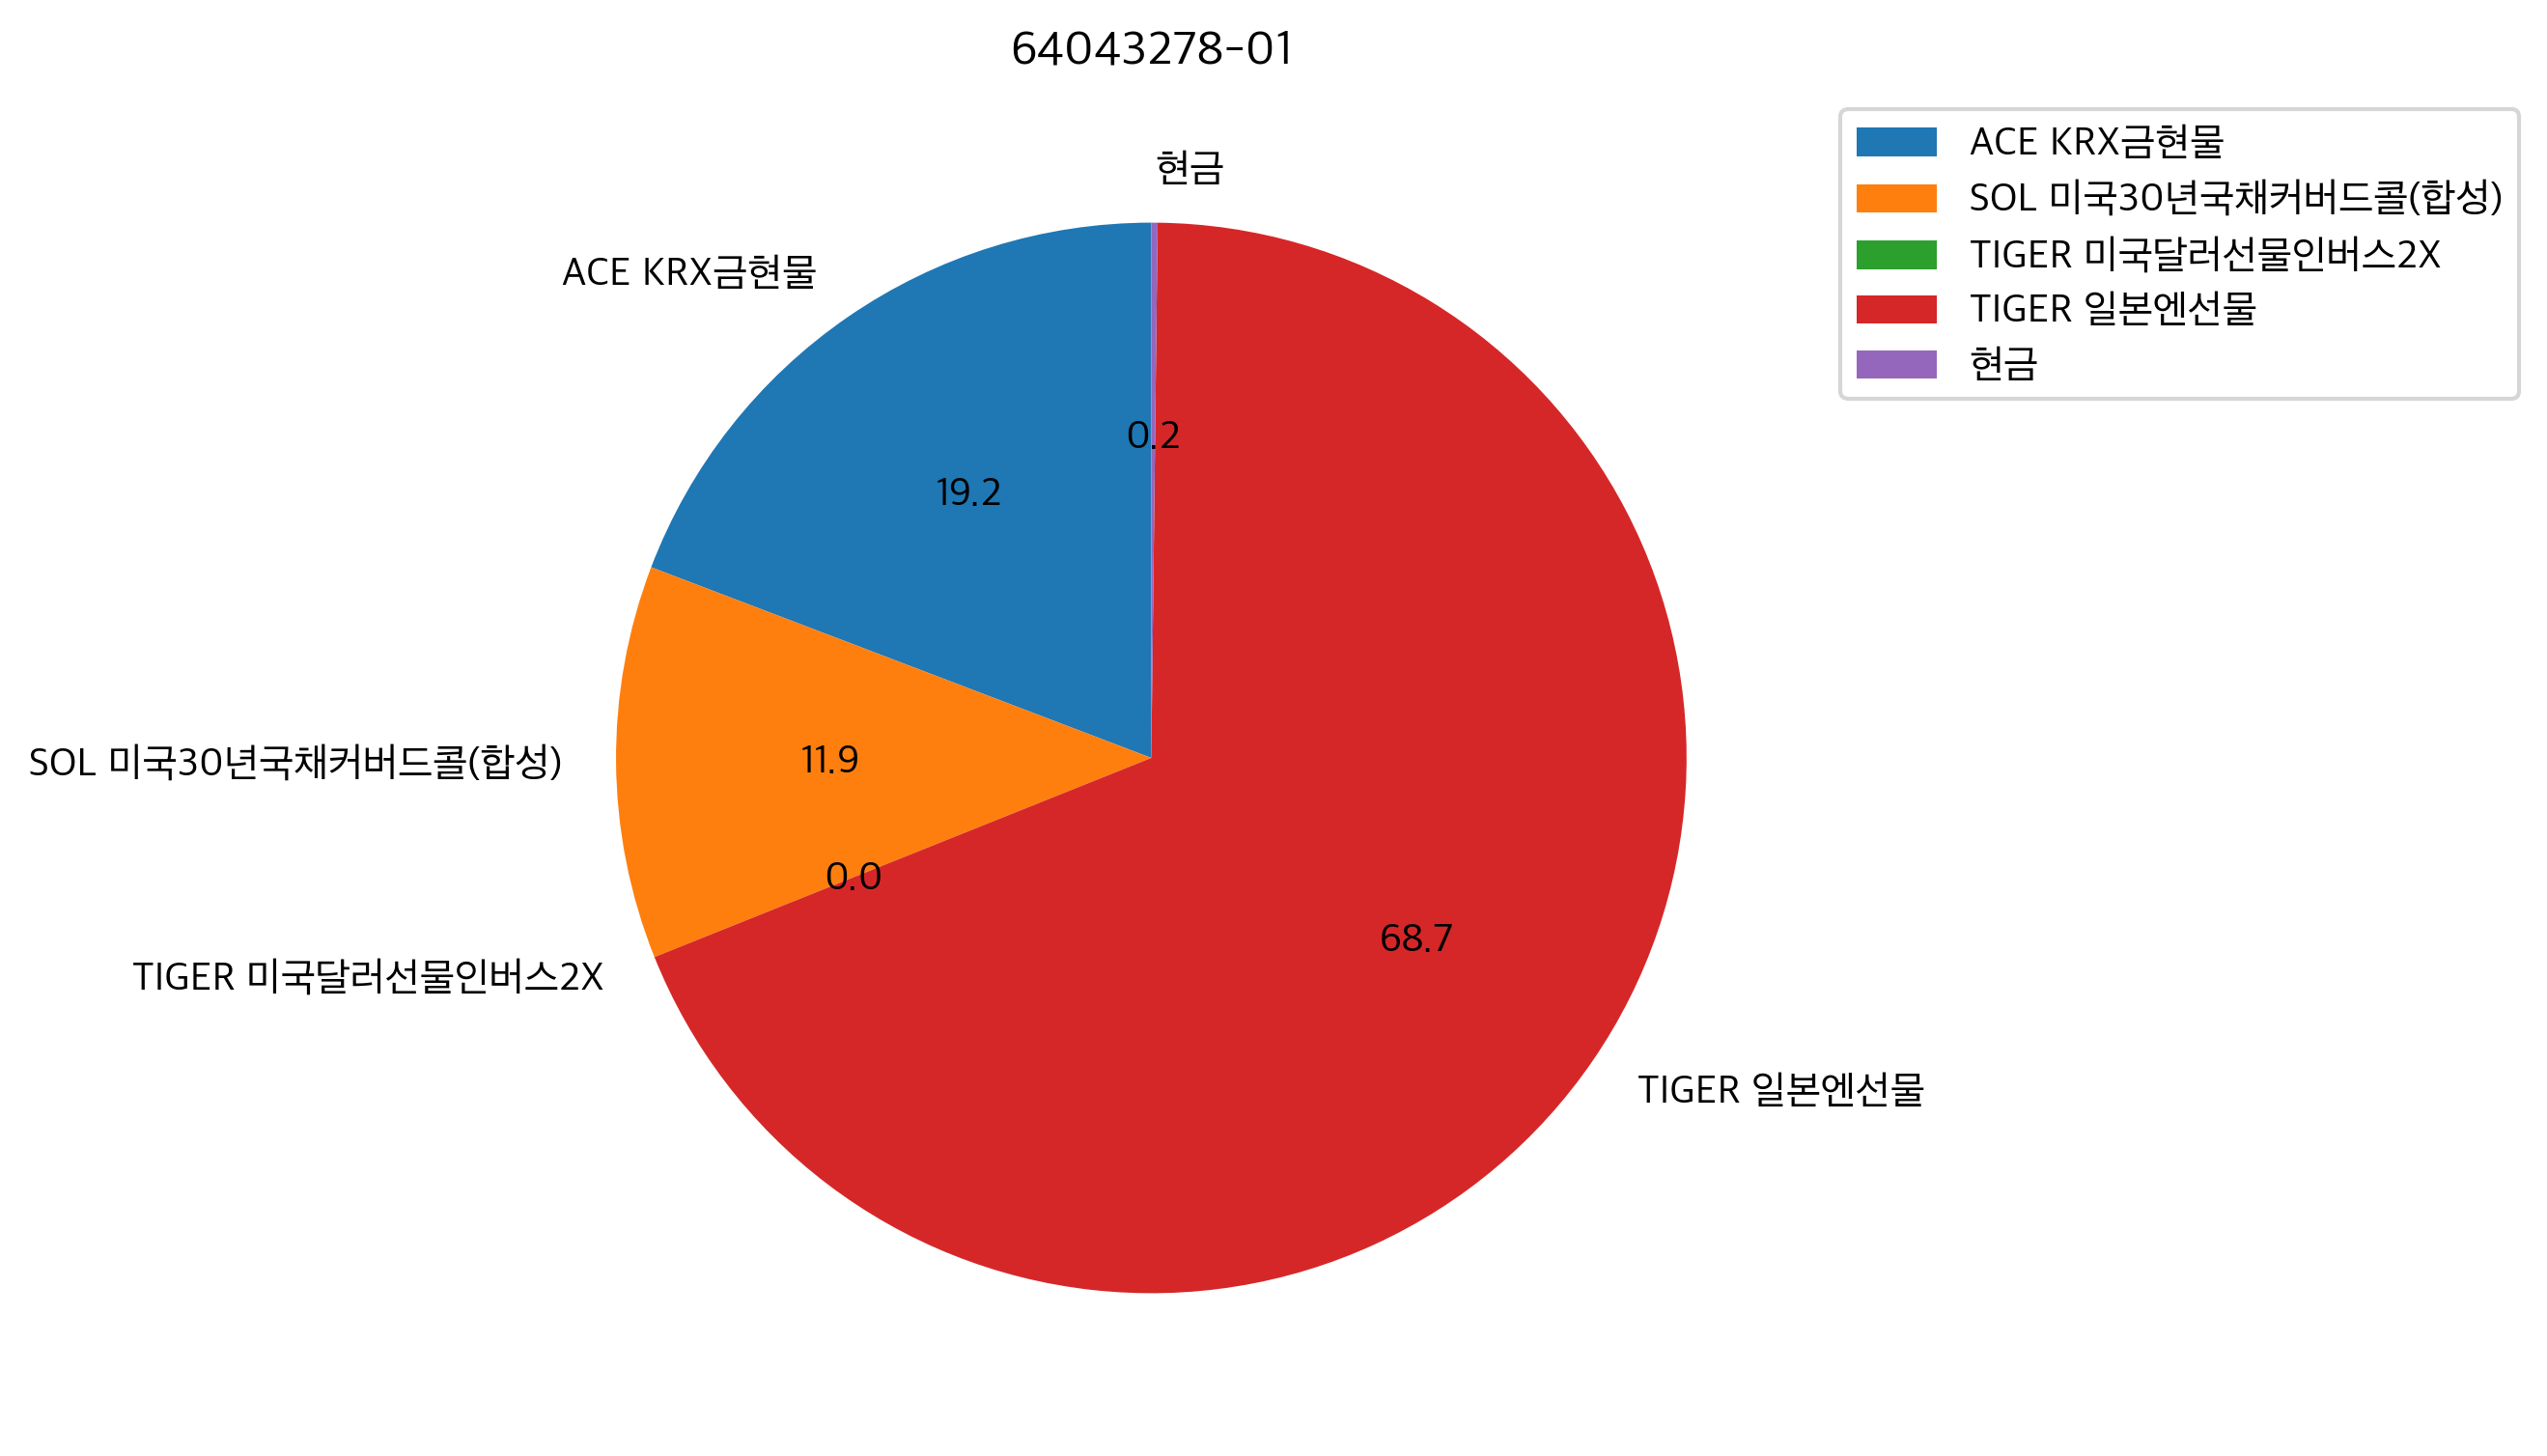

In [325]:
df_3["비중"] = df_3["평가금액"] / df_3["평가금액"].sum() * 100
display(df_3)
show_pie(df_3["평가금액"], df_3["이름"], acc_no_isa, df_3["이름"])

In [326]:
total_3

13346105

,코드,이름,평가금액,단가,수량,매입금액,매입단가,수익률,계좌,비중
6,411060,ACE KRX금현물,4630035,17085,271,4479665,16530.13,3.36,64012548-29,12.84
5,365780,ACE 국고채10년,3668145,94055,39,3572105,91592.44,2.69,64012548-29,10.17
4,360200,ACE 미국S&P500,4411990,21110,209,4367815,20898.64,1.01,64012548-29,12.23
8,456880,ACE 미국달러SOFR금리(합성),458000,11450,40,457800,11445.00,0.04,64012548-29,1.27
1,283580,KODEX 차이나CSI300,1667925,12355,135,1706200,12638.52,-2.24,64012548-29,4.62
2,294400,KOSEF 200TR,1330560,41580,32,1316800,41150.00,1.04,64012548-29,3.69
9,473330,SOL 미국30년국채커버드콜(합성),3934000,9835,400,3904500,9761.25,0.76,64012548-29,10.91
3,357870,TIGER CD금리투자KIS(합성),8852800,55330,160,8841600,55260.00,0.13,64012548-29,24.54
7,456610,TIGER 미국달러SOFR금리액티브(합성),6213900,56490,110,6217355,56521.41,-0.06,64012548-29,17.23
0,241180,TIGER 일본니케이225,899430,21415,42,884335,21055.60,1.71,64012548-29,2.49


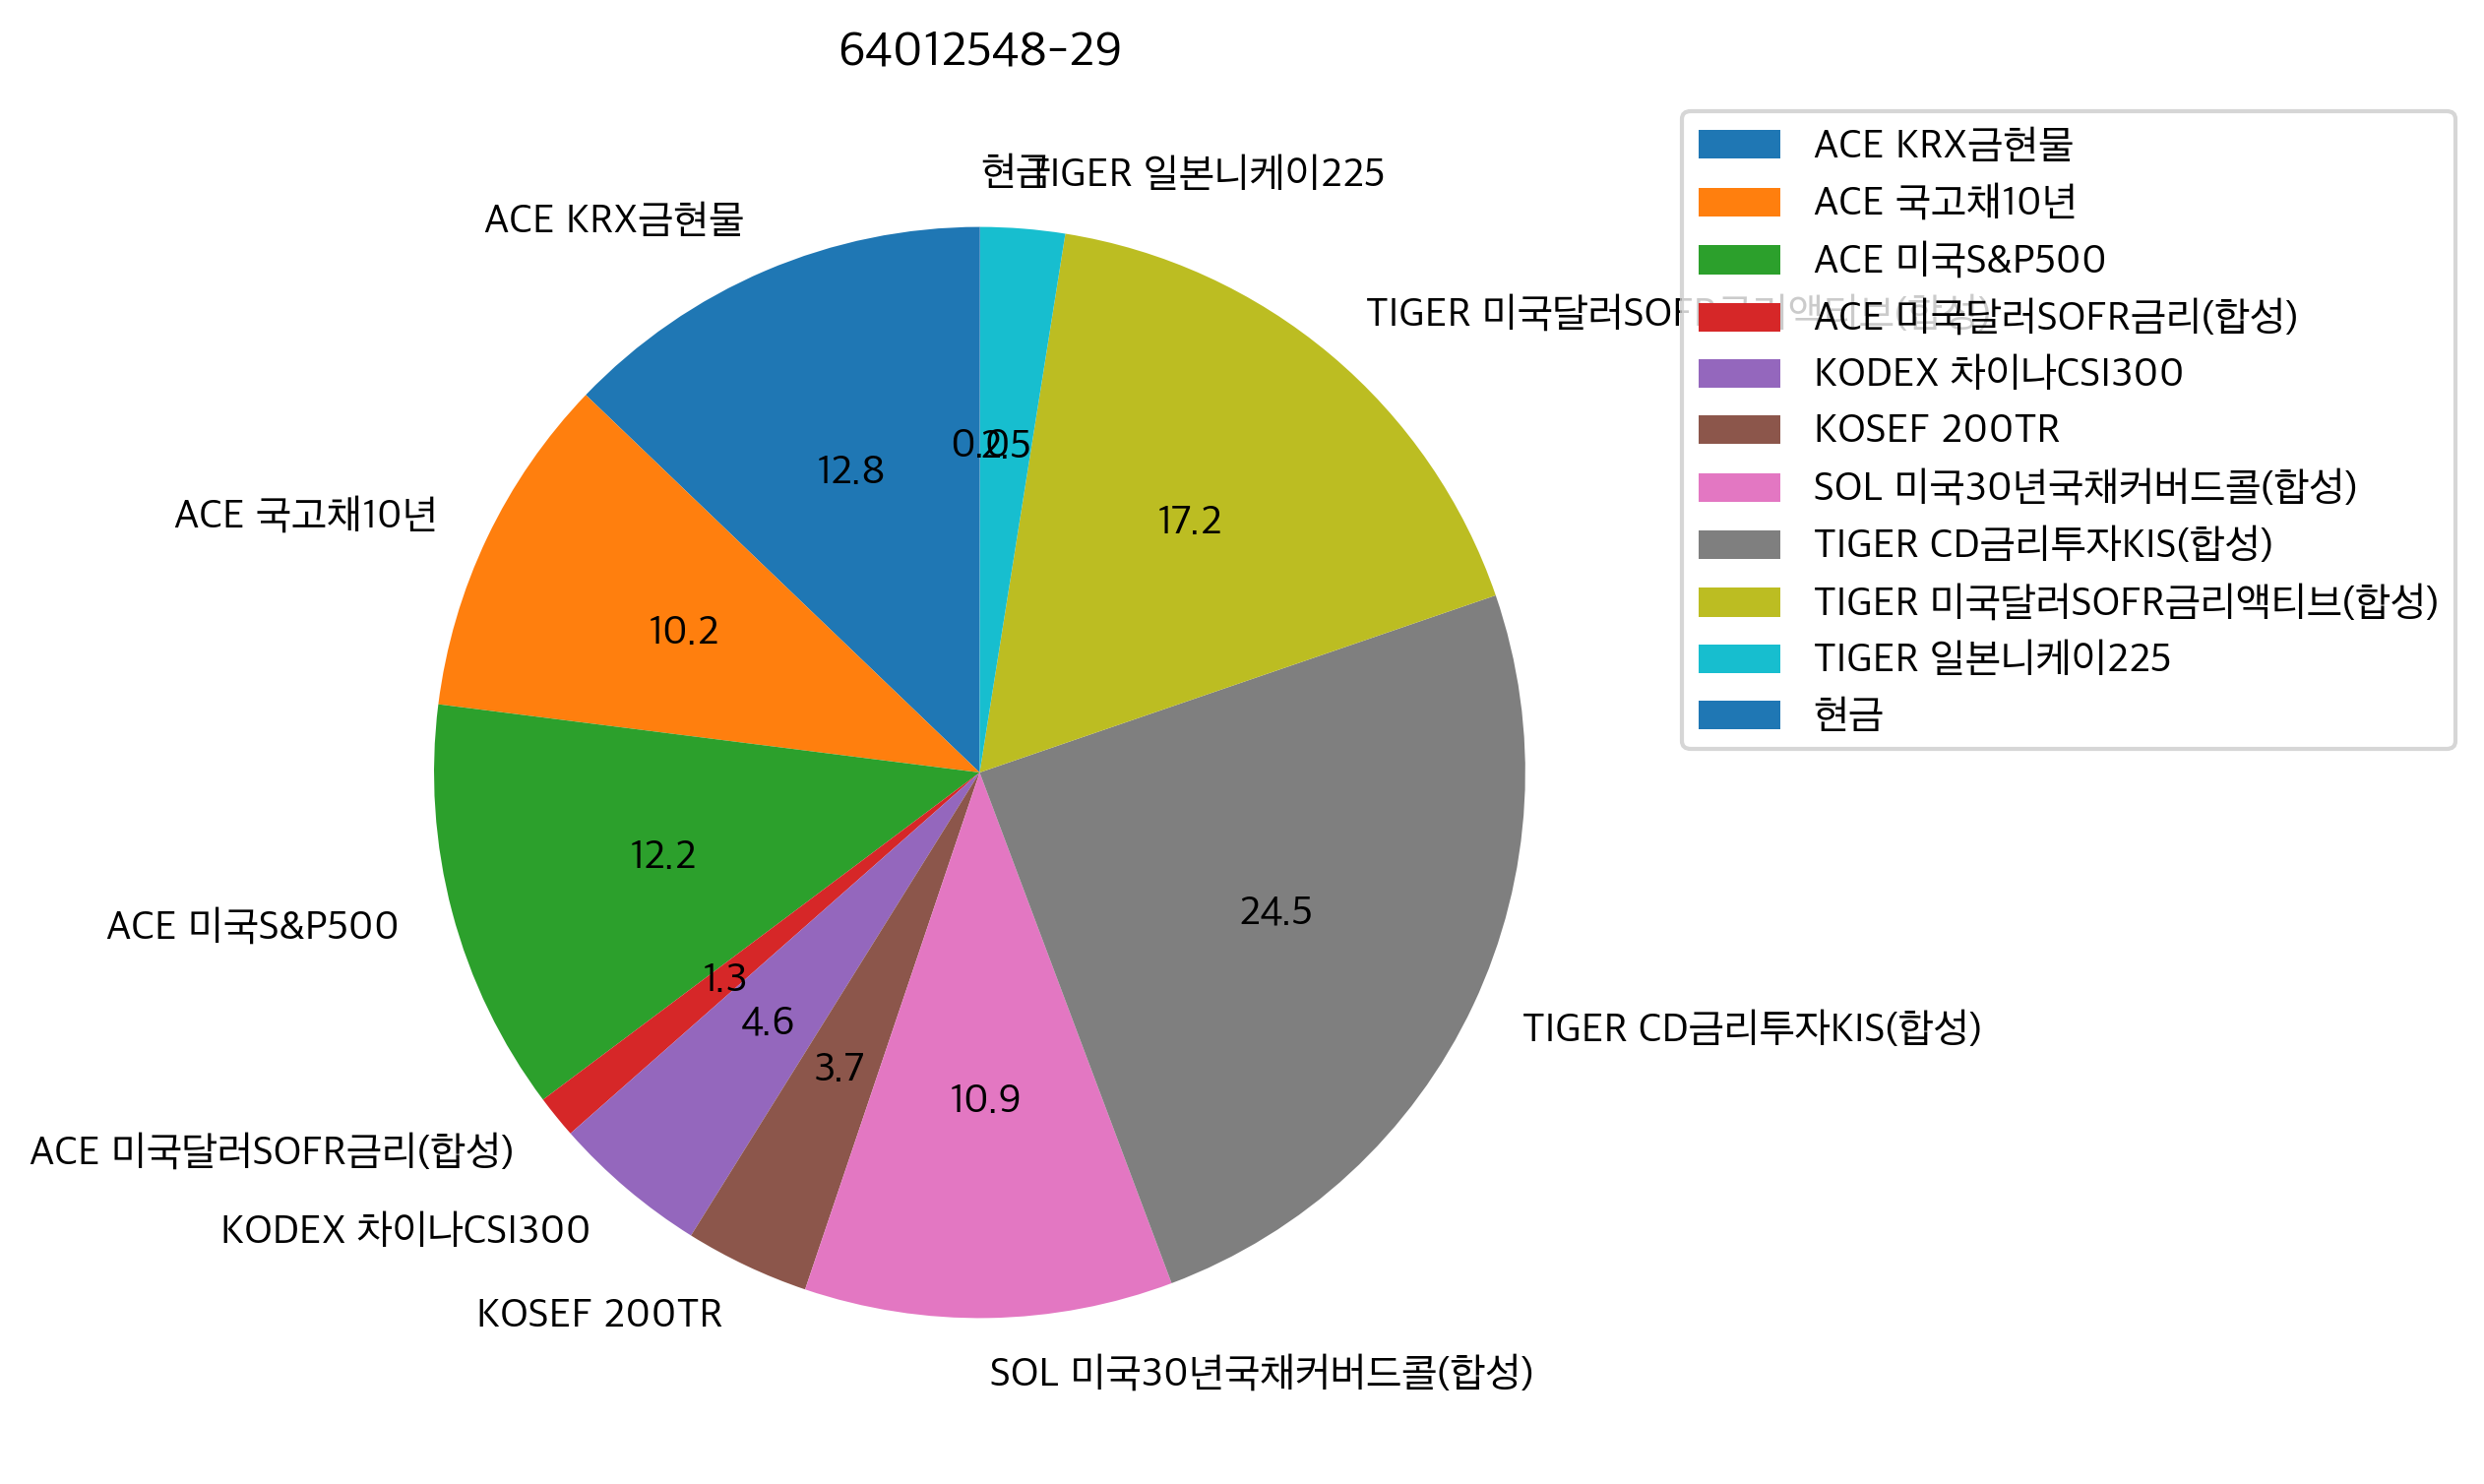

In [327]:
df_4["비중"] = df_4["평가금액"] / df_4["평가금액"].sum() * 100
display(df_4)
show_pie(df_4["평가금액"], df_4["이름"], acc_no_irp, df_4["이름"])

In [328]:
total_4

36072837

In [329]:
# 그룹화하여 조건에 맞게 계산
result = df.groupby('코드').agg({
    '이름': 'first',
    '평가금액': 'sum',
    '단가': 'mean',
    '수량': 'sum',
    '매입금액': 'sum',
    '매입단가': 'mean',
}).reset_index()

result["비중"] = result["평가금액"] / result["평가금액"].sum() * 100
result["수익률"] = (result["평가금액"] - result["매입금액"]) / result["매입금액"] * 100
result.dropna(inplace=True)

# 결과 출력
result

,코드,이름,평가금액,단가,수량,매입금액,매입단가,비중,수익률
0,0,현금,47668,1.00,47668,47668,1.00,0.04,0.00
1,218420,KODEX 미국S&P500에너지(합성),769500,15390.00,50,654832,13096.64,0.67,17.51
2,241180,TIGER 일본니케이225,2184330,21415.00,102,2144035,21025.30,1.89,1.88
4,283580,KODEX 차이나CSI300,3521175,12355.00,285,3600155,12632.44,3.05,-2.19
5,292560,TIGER 일본엔선물,9174810,8805.00,1042,8991845,8629.41,7.96,2.03
6,294400,KOSEF 200TR,3451140,41580.00,83,3409900,41095.59,2.99,1.21
7,308620,KODEX 미국10년국채선물,4937480,11645.00,424,4875895,11499.75,4.28,1.26
8,357870,TIGER CD금리투자KIS(합성),21302050,55330.00,385,21275100,55260.00,18.48,0.13
9,360200,ACE 미국S&P500,12855990,21110.00,609,12305895,19998.27,11.15,4.47
10,365780,ACE 국고채10년,7994675,94055.00,85,7785255,91591.33,6.93,2.69


115287398

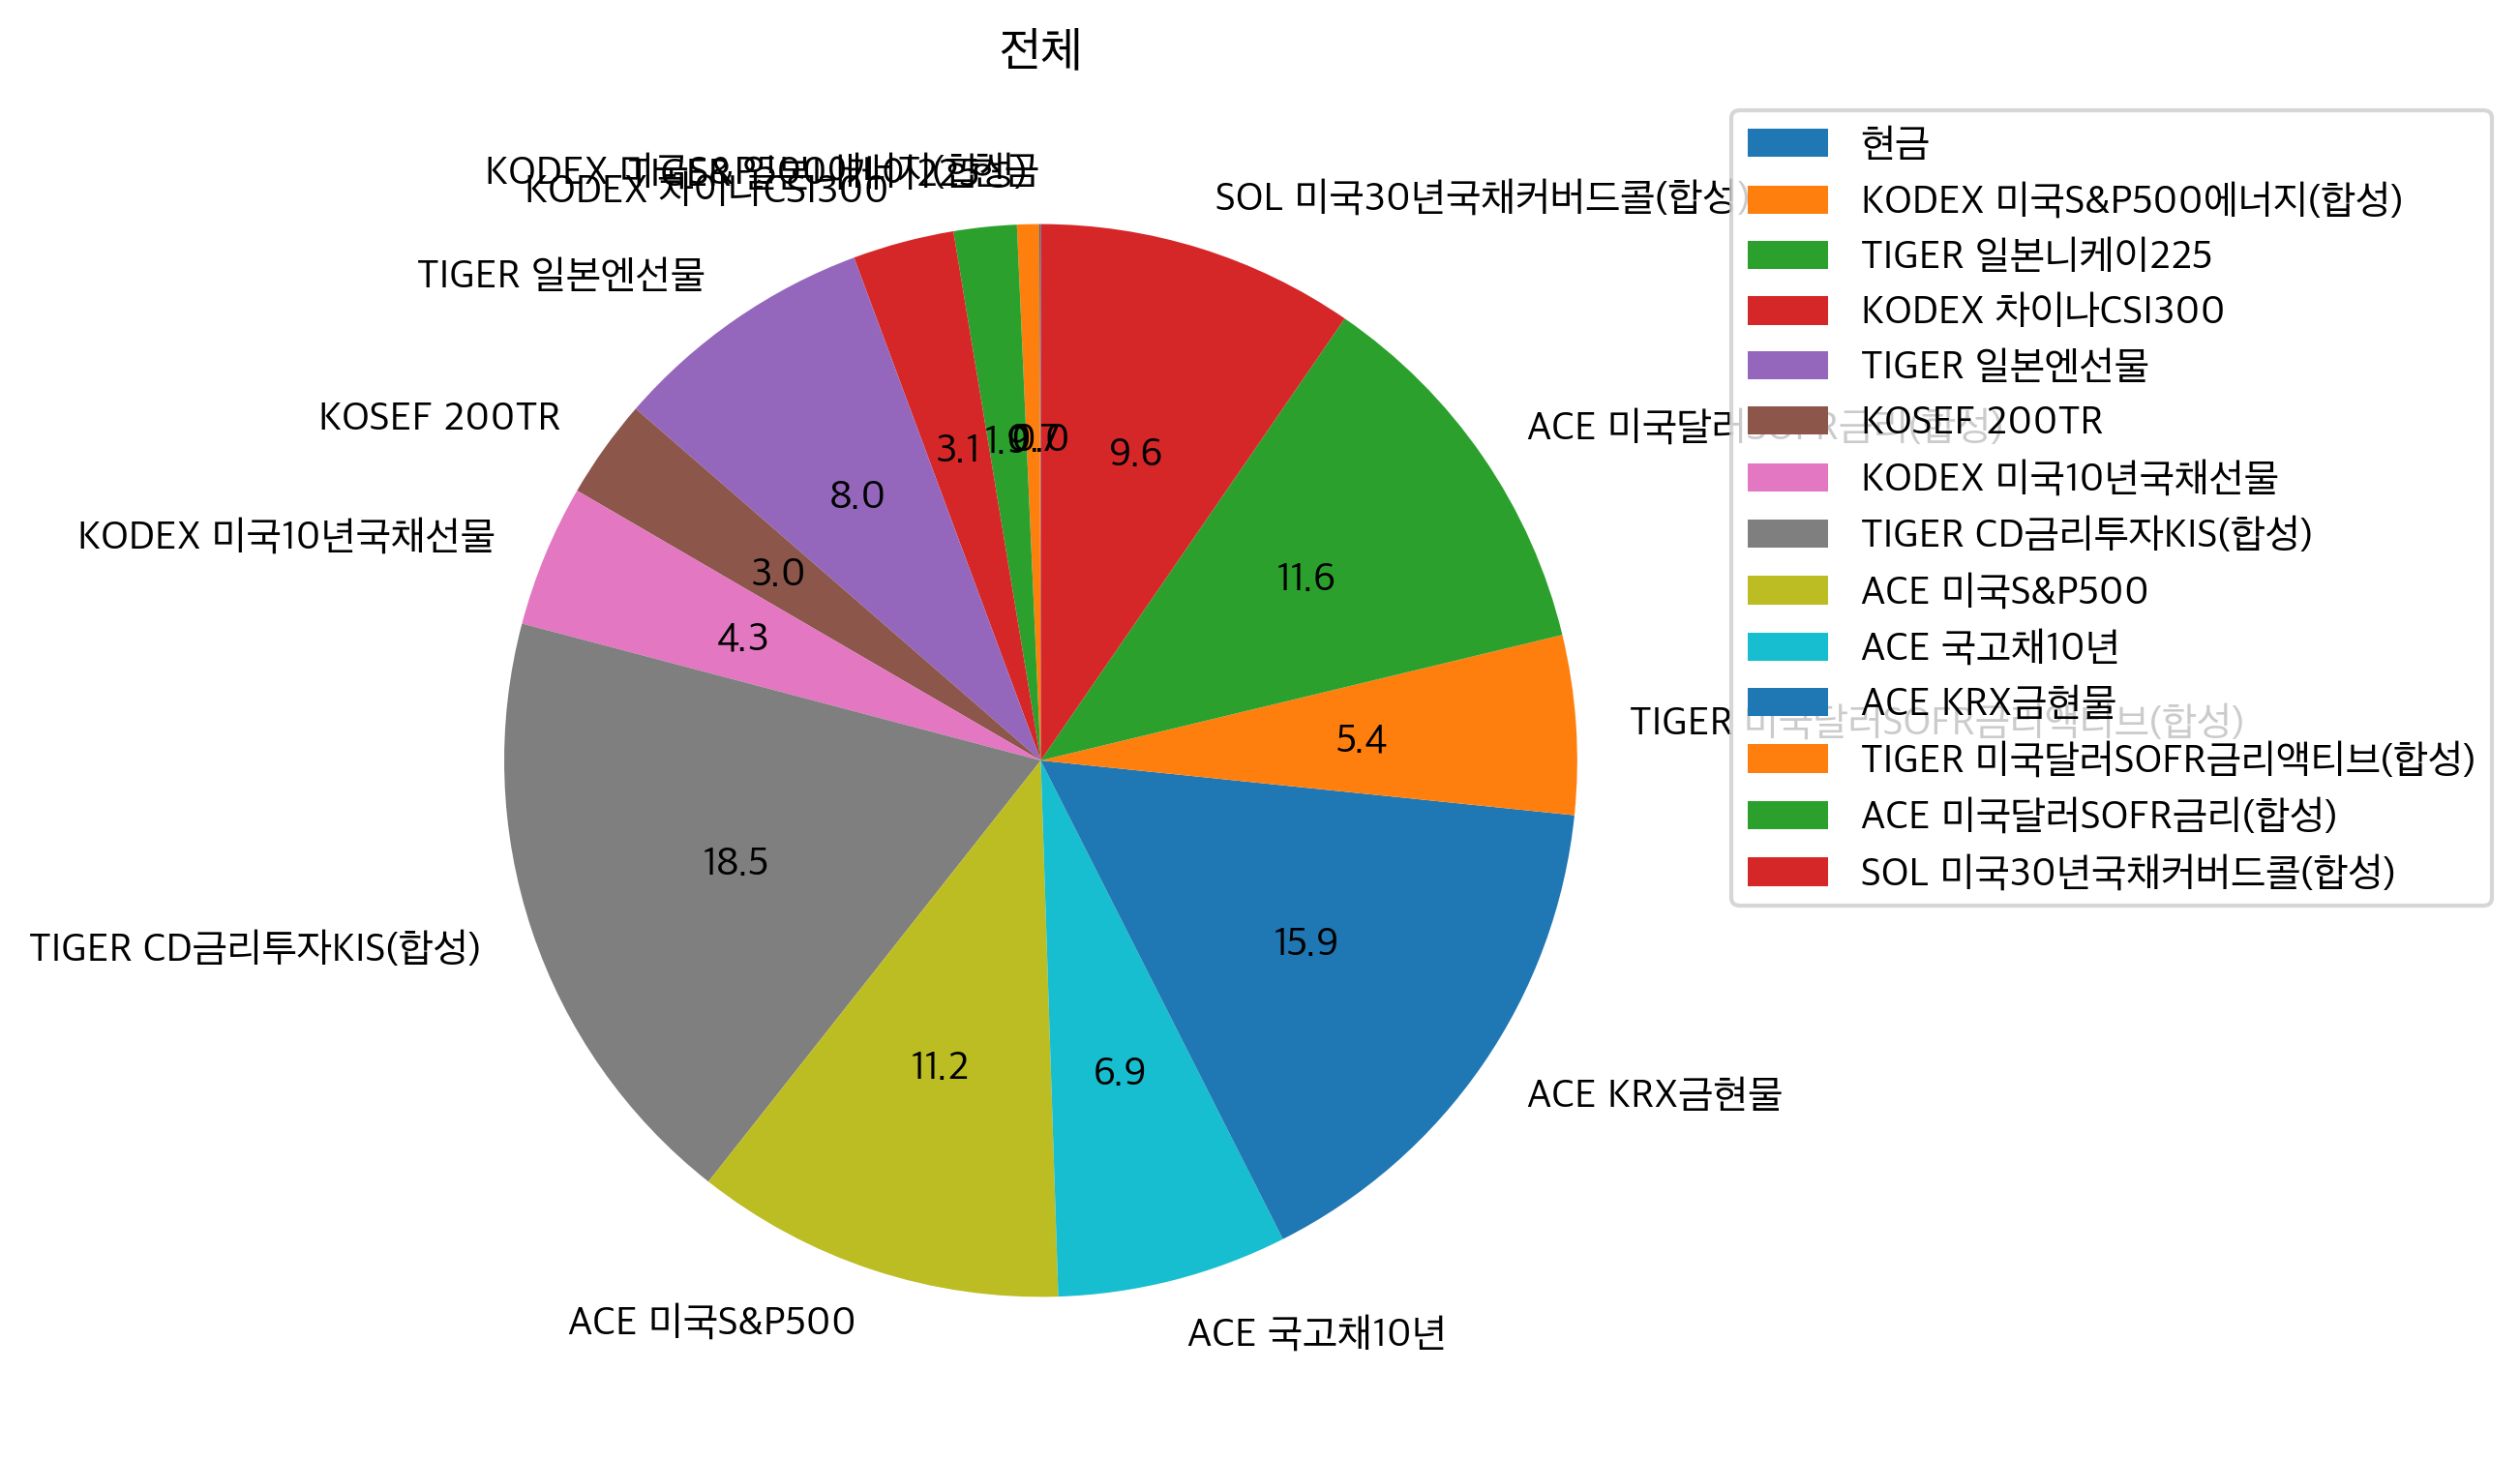

In [330]:
eval_total = result['평가금액'].sum()
display(eval_total)
show_pie(result["평가금액"], result["이름"], "전체", result["이름"])

,코드,이름,평가금액,단가,수량,매입금액,매입단가,비중,수익률
0,0,현금,16906,1.00,16906,16906,1.00,0.02,0.00
1,241180,TIGER 일본니케이225,2184330,21415.00,102,2144035,21025.30,2.49,1.88
2,283580,KODEX 차이나CSI300,3521175,12355.00,285,3600155,12632.44,4.01,-2.19
3,294400,KOSEF 200TR,3451140,41580.00,83,3409900,41095.59,3.93,1.21
4,308620,KODEX 미국10년국채선물,4937480,11645.00,424,4875895,11499.75,5.63,1.26
5,357870,TIGER CD금리투자KIS(합성),21302050,55330.00,385,21275100,55260.00,24.29,0.13
6,360200,ACE 미국S&P500,9583940,21110.00,454,9480620,20883.61,10.93,1.09
7,365780,ACE 국고채10년,7994675,94055.00,85,7785255,91591.33,9.12,2.69
8,411060,ACE KRX금현물,10011810,17085.00,586,9668728,16501.67,11.42,3.55
9,456610,TIGER 미국달러SOFR금리액티브(합성),6213900,56490.00,110,6217355,56521.41,7.08,-0.06


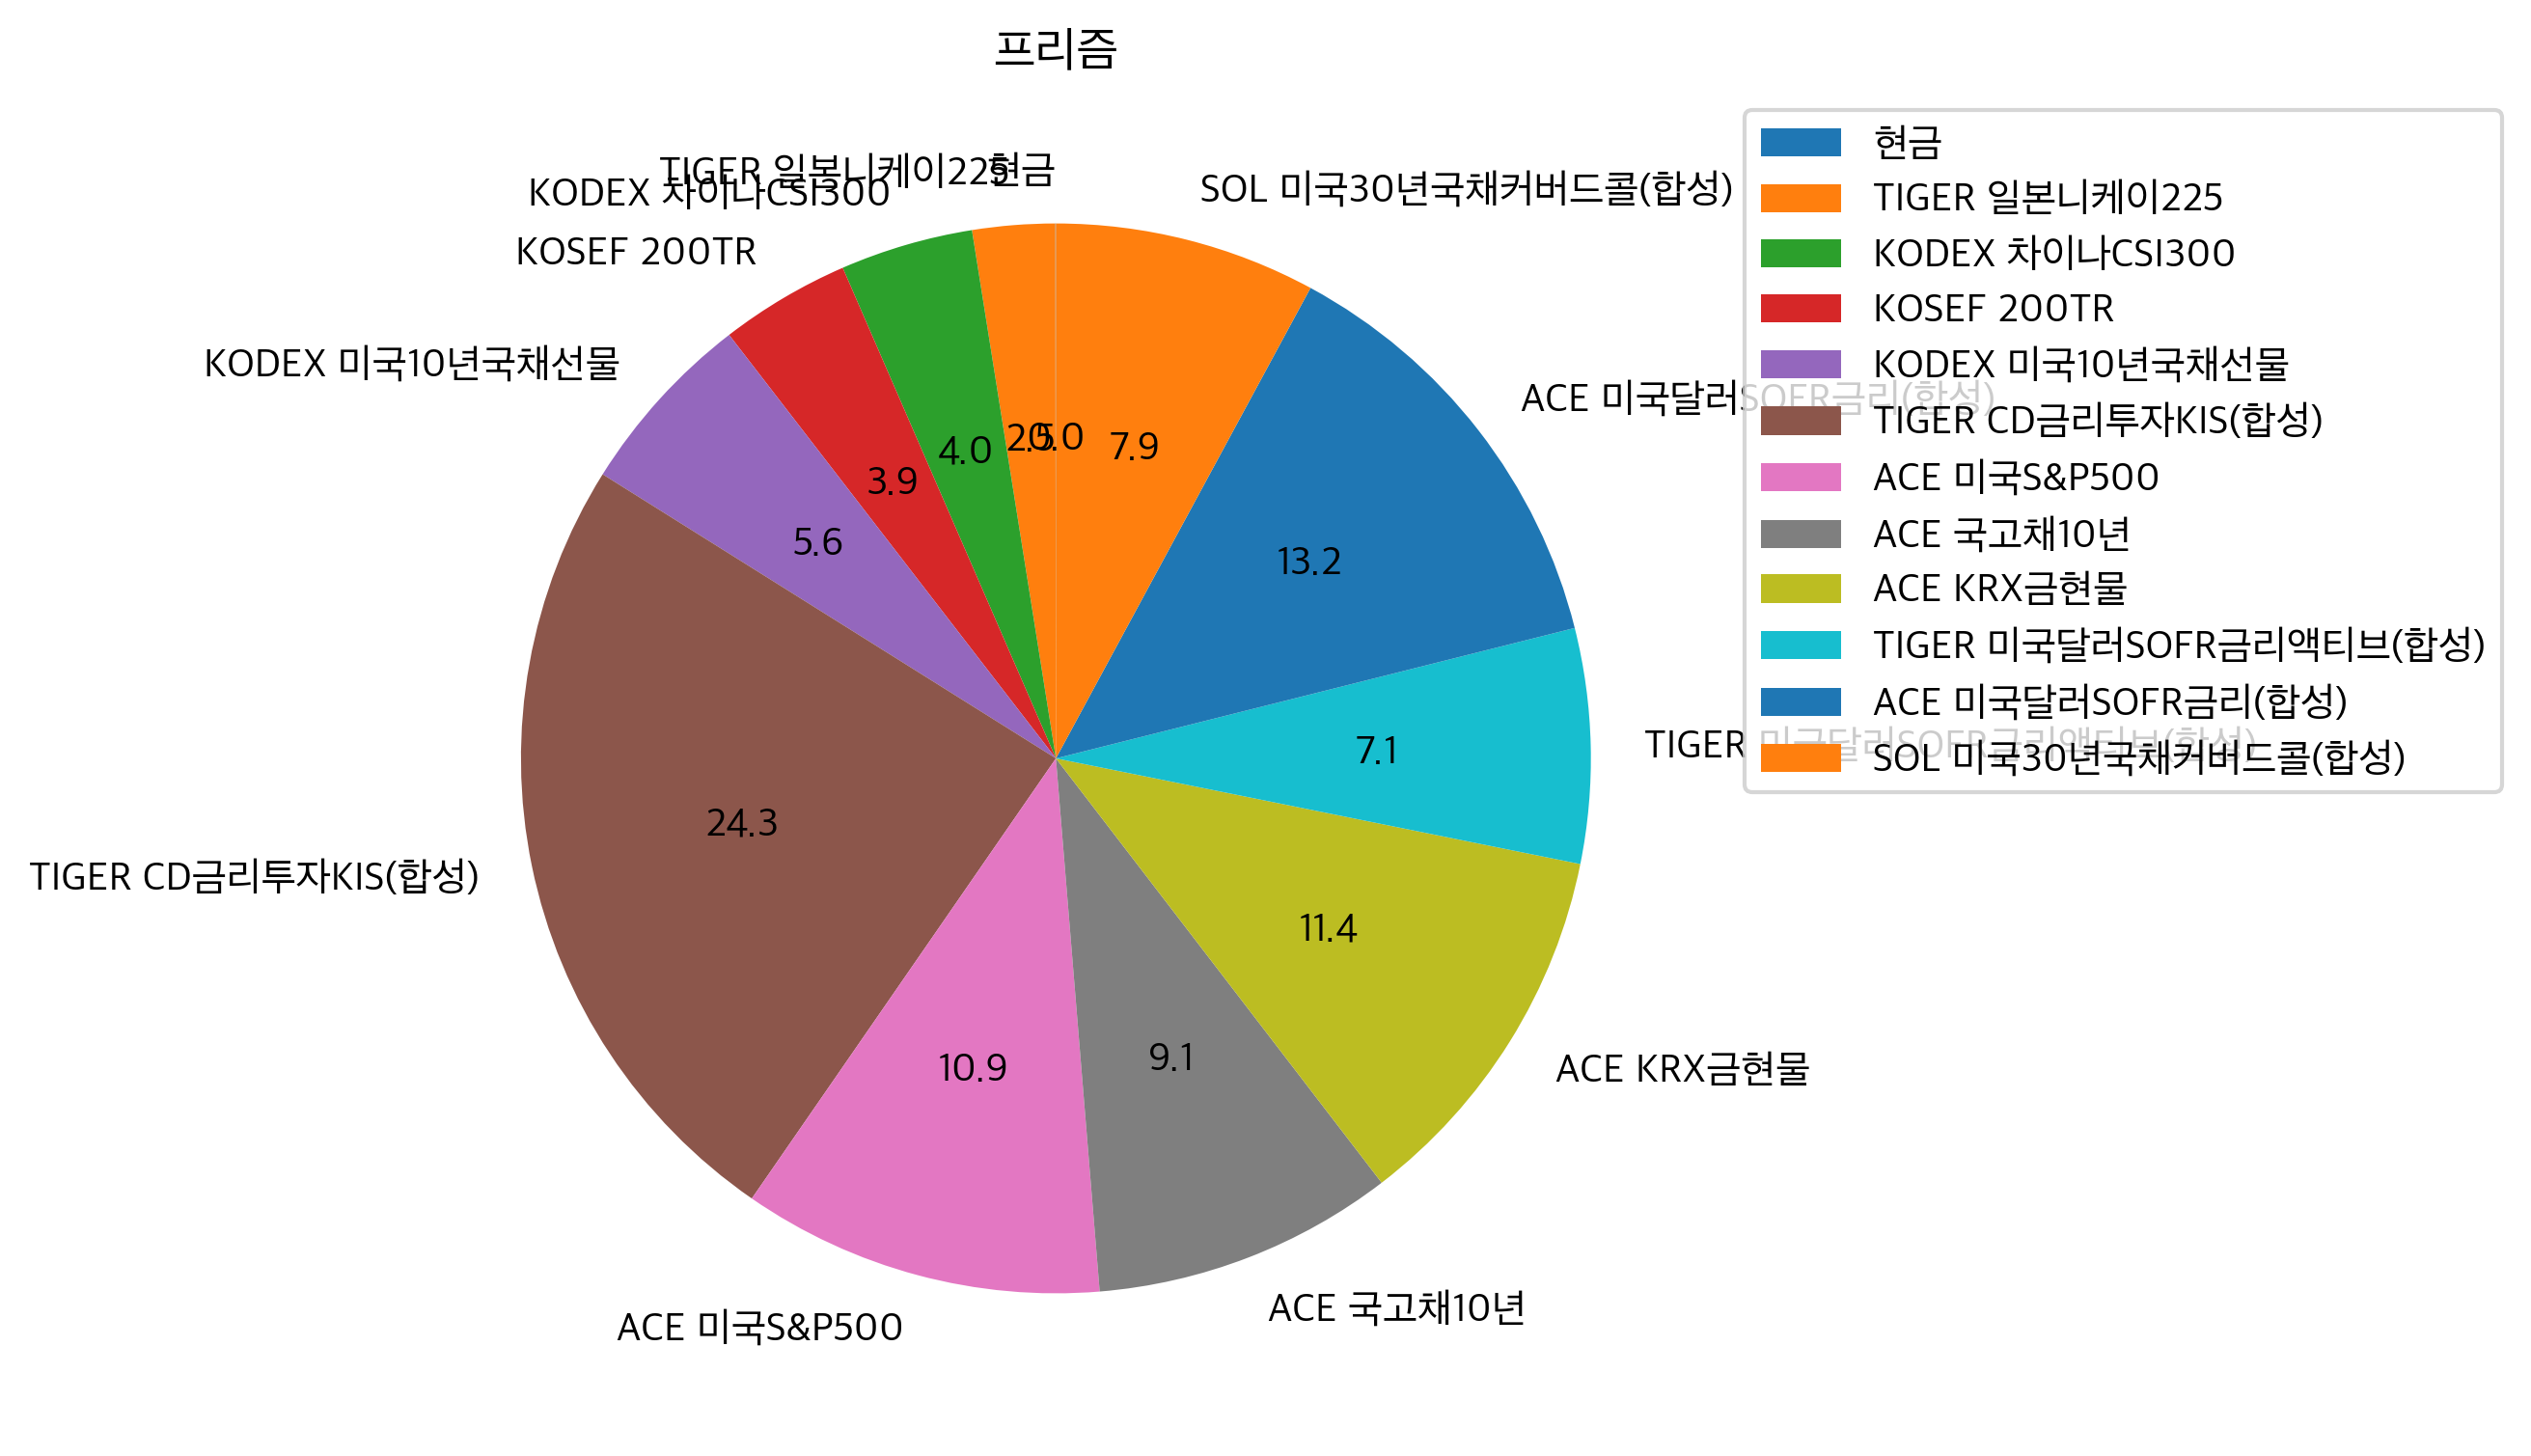

In [331]:
result_frison = df_frison.groupby('코드').agg({
    '이름': 'first',
    '평가금액': 'sum',
    '단가': 'mean',
    '수량': 'sum',
    '매입금액': 'sum',
    '매입단가': 'mean',
}).reset_index()

result_frison["비중"] = result_frison["평가금액"] / result_frison["평가금액"].sum() * 100
result_frison["수익률"] = (result_frison["평가금액"] - result_frison["매입금액"]) / result_frison["매입금액"] * 100
display(result_frison)
show_pie(result_frison["평가금액"], result_frison["이름"], "프리즘", result_frison["이름"])

In [332]:
# 카테고리 분류
# 114800	KODEX 인버스
# 283580	KODEX 차이나CSI300
# 284430	KODEX 200미국채혼합
# 449170    TIGER KOFR금리액티브(합성)
# 464540    RISE 25-03 회사채(AA-이상)액티브
# 483230    RISE 25-06 은행채(AA+이상)액티브
# 456880    ACE 미국달러SOFR금리(합성)
# 468380    KODEX iShares미국하이일드액티브
# 329750    TIGER 미국달러단기채권액티브
# 261270    KODEX미국달러선물인버스

원화현금 = ["0", "449170", "464540", "483230", "357870"]
달러현금 = ["456880", "468380", "329750", "456610"]
국내주식 = ["396500", "114800", "295040", "294400"]
미국주식 = ["360200", "390390", "402970", "469050", "480020", "482730", "446720", "452360", "489250"]
해외주식 = ["283580", "453810", "241180"]
미국채권 = ["284430", "473330", "308620"]
국내채권 = ["365780" ]
대채투자 = ["411060", "475380", "218420"]
달러헷지 = ["261270", "476750", "261120", "292560"]

def set_category(result):
    result['카테고리'] = '기타'
    result.loc[result['코드'].isin(원화현금), '카테고리'] = '원화현금'
    result.loc[result['코드'].isin(달러현금), '카테고리'] = '달러현금'
    result.loc[result['코드'].isin(국내주식), '카테고리'] = '국내주식'
    result.loc[result['코드'].isin(미국주식), '카테고리'] = '미국주식'
    result.loc[result['코드'].isin(해외주식), '카테고리'] = '해외주식'
    result.loc[result['코드'].isin(미국채권), '카테고리'] = '미국채권'
    result.loc[result['코드'].isin(국내채권), '카테고리'] = '국내채권'
    result.loc[result['코드'].isin(대채투자), '카테고리'] = '대채투자'
    result.loc[result['코드'].isin(달러헷지), '카테고리'] = '달러헷지'
    # 새로운 '분류' 컬럼 추가
    result['대분류'] = result['카테고리']
    result.loc[result['카테고리'].str.contains('현금'), '대분류'] = '현금성'
    result.loc[result['카테고리'].str.contains('주식'), '대분류'] = '주식형'
    result.loc[result['카테고리'].str.contains('채권'), '대분류'] = '채권형'
    result.loc[result['카테고리'].str.contains('대채투자'), '대분류'] = '대체투자'
    result.loc[result['카테고리'].str.contains('달러헷지'), '대분류'] = '대체투자'
    result.sort_values(by='대분류', inplace=True)
    result
    
set_category(result)
set_category(result_frison)

display(result)
display(result_frison)


,코드,이름,평가금액,단가,수량,매입금액,매입단가,비중,수익률,카테고리,대분류
1,218420,KODEX 미국S&P500에너지(합성),769500,15390.00,50,654832,13096.64,0.67,17.51,대채투자,대체투자
5,292560,TIGER 일본엔선물,9174810,8805.00,1042,8991845,8629.41,7.96,2.03,달러헷지,대체투자
11,411060,ACE KRX금현물,18349290,17085.00,1074,17525173,16323.97,15.92,4.70,대채투자,대체투자
2,241180,TIGER 일본니케이225,2184330,21415.00,102,2144035,21025.30,1.89,1.88,해외주식,주식형
4,283580,KODEX 차이나CSI300,3521175,12355.00,285,3600155,12632.44,3.05,-2.19,해외주식,주식형
6,294400,KOSEF 200TR,3451140,41580.00,83,3409900,41095.59,2.99,1.21,국내주식,주식형
9,360200,ACE 미국S&P500,12855990,21110.00,609,12305895,19998.27,11.15,4.47,미국주식,주식형
7,308620,KODEX 미국10년국채선물,4937480,11645.00,424,4875895,11499.75,4.28,1.26,미국채권,채권형
10,365780,ACE 국고채10년,7994675,94055.00,85,7785255,91591.33,6.93,2.69,국내채권,채권형
15,473330,SOL 미국30년국채커버드콜(합성),11054540,9835.00,1124,10989598,9783.59,9.59,0.59,미국채권,채권형


,코드,이름,평가금액,단가,수량,매입금액,매입단가,비중,수익률,카테고리,대분류
8,411060,ACE KRX금현물,10011810,17085.00,586,9668728,16501.67,11.42,3.55,대채투자,대체투자
1,241180,TIGER 일본니케이225,2184330,21415.00,102,2144035,21025.30,2.49,1.88,해외주식,주식형
2,283580,KODEX 차이나CSI300,3521175,12355.00,285,3600155,12632.44,4.01,-2.19,해외주식,주식형
3,294400,KOSEF 200TR,3451140,41580.00,83,3409900,41095.59,3.93,1.21,국내주식,주식형
6,360200,ACE 미국S&P500,9583940,21110.00,454,9480620,20883.61,10.93,1.09,미국주식,주식형
4,308620,KODEX 미국10년국채선물,4937480,11645.00,424,4875895,11499.75,5.63,1.26,미국채권,채권형
7,365780,ACE 국고채10년,7994675,94055.00,85,7785255,91591.33,9.12,2.69,국내채권,채권형
11,473330,SOL 미국30년국채커버드콜(합성),6923840,9835.00,704,6872805,9762.71,7.89,0.74,미국채권,채권형
0,0,현금,16906,1.00,16906,16906,1.00,0.02,0.00,원화현금,현금성
5,357870,TIGER CD금리투자KIS(합성),21302050,55330.00,385,21275100,55260.00,24.29,0.13,원화현금,현금성


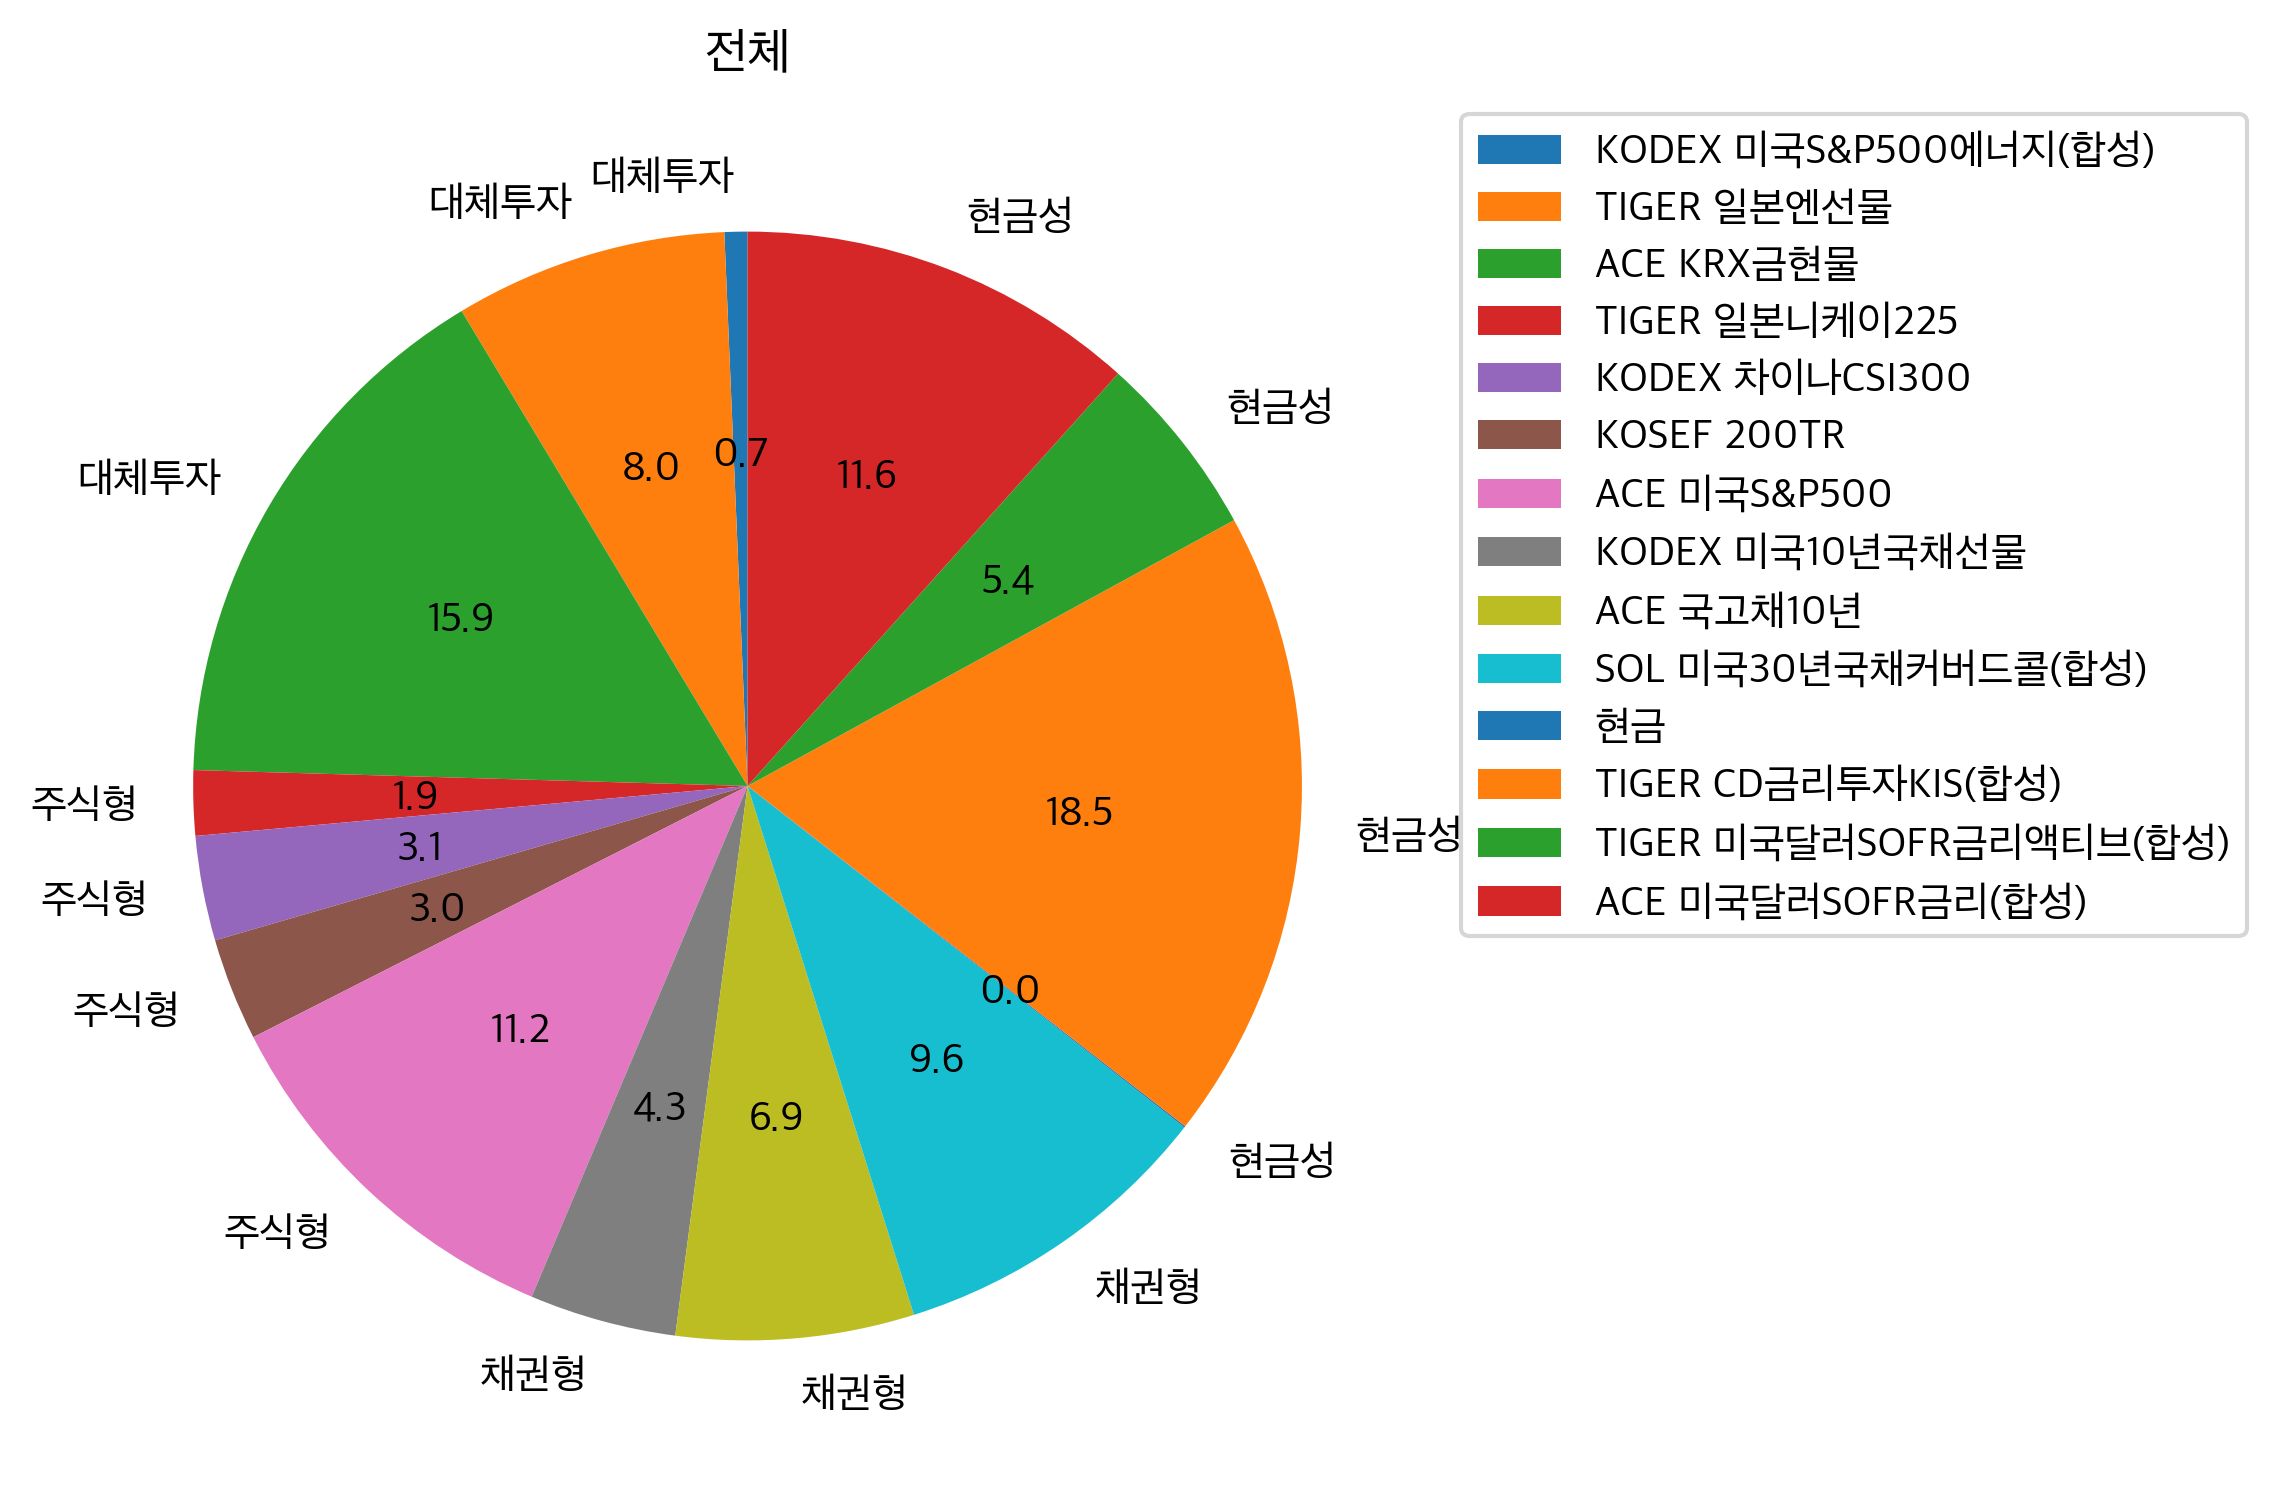

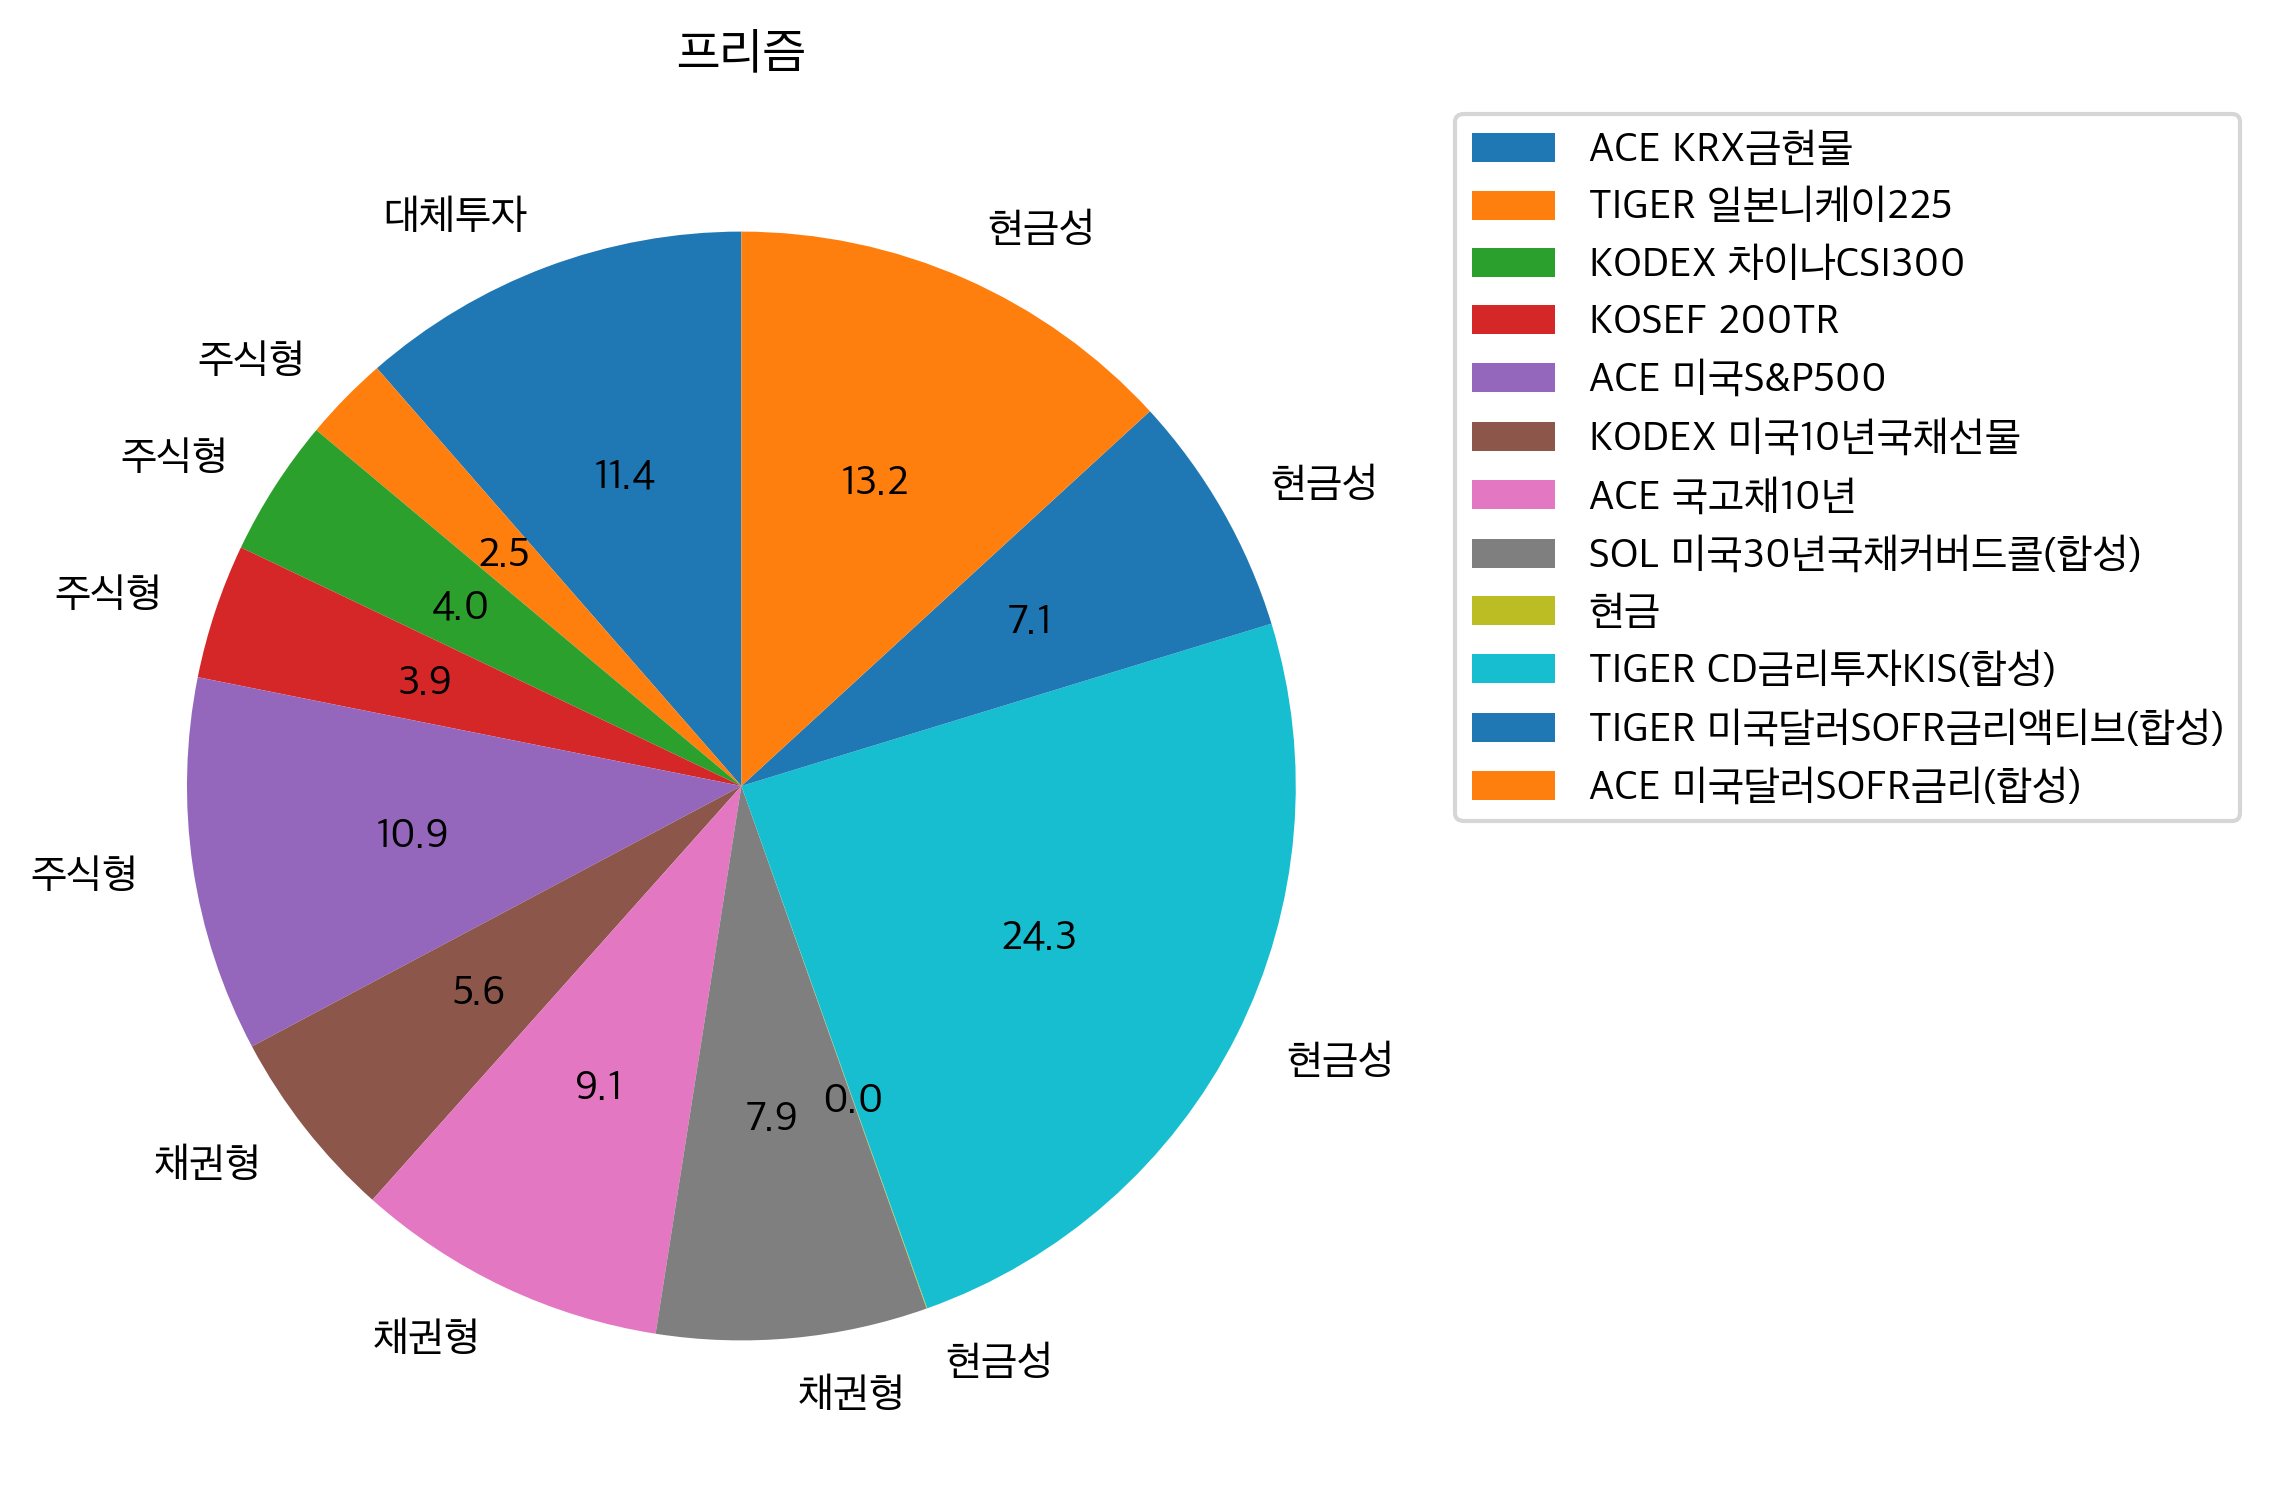

In [333]:

show_pie(result["평가금액"], result["대분류"], "전체", result["이름"])
show_pie(result_frison["평가금액"], result_frison["대분류"], "프리즘", result_frison["이름"])


,대분류,평가금액,단가,수량,매입금액,비중,수익률
0,대체투자,28293600,13760.00,2166,27171850,24.54,4.13
1,주식형,22012635,24115.00,1079,21459985,19.09,2.58
2,채권형,23986695,38511.67,1633,23650748,20.81,1.42
3,현금성,40994468,30817.75,49336,40947953,35.56,0.11


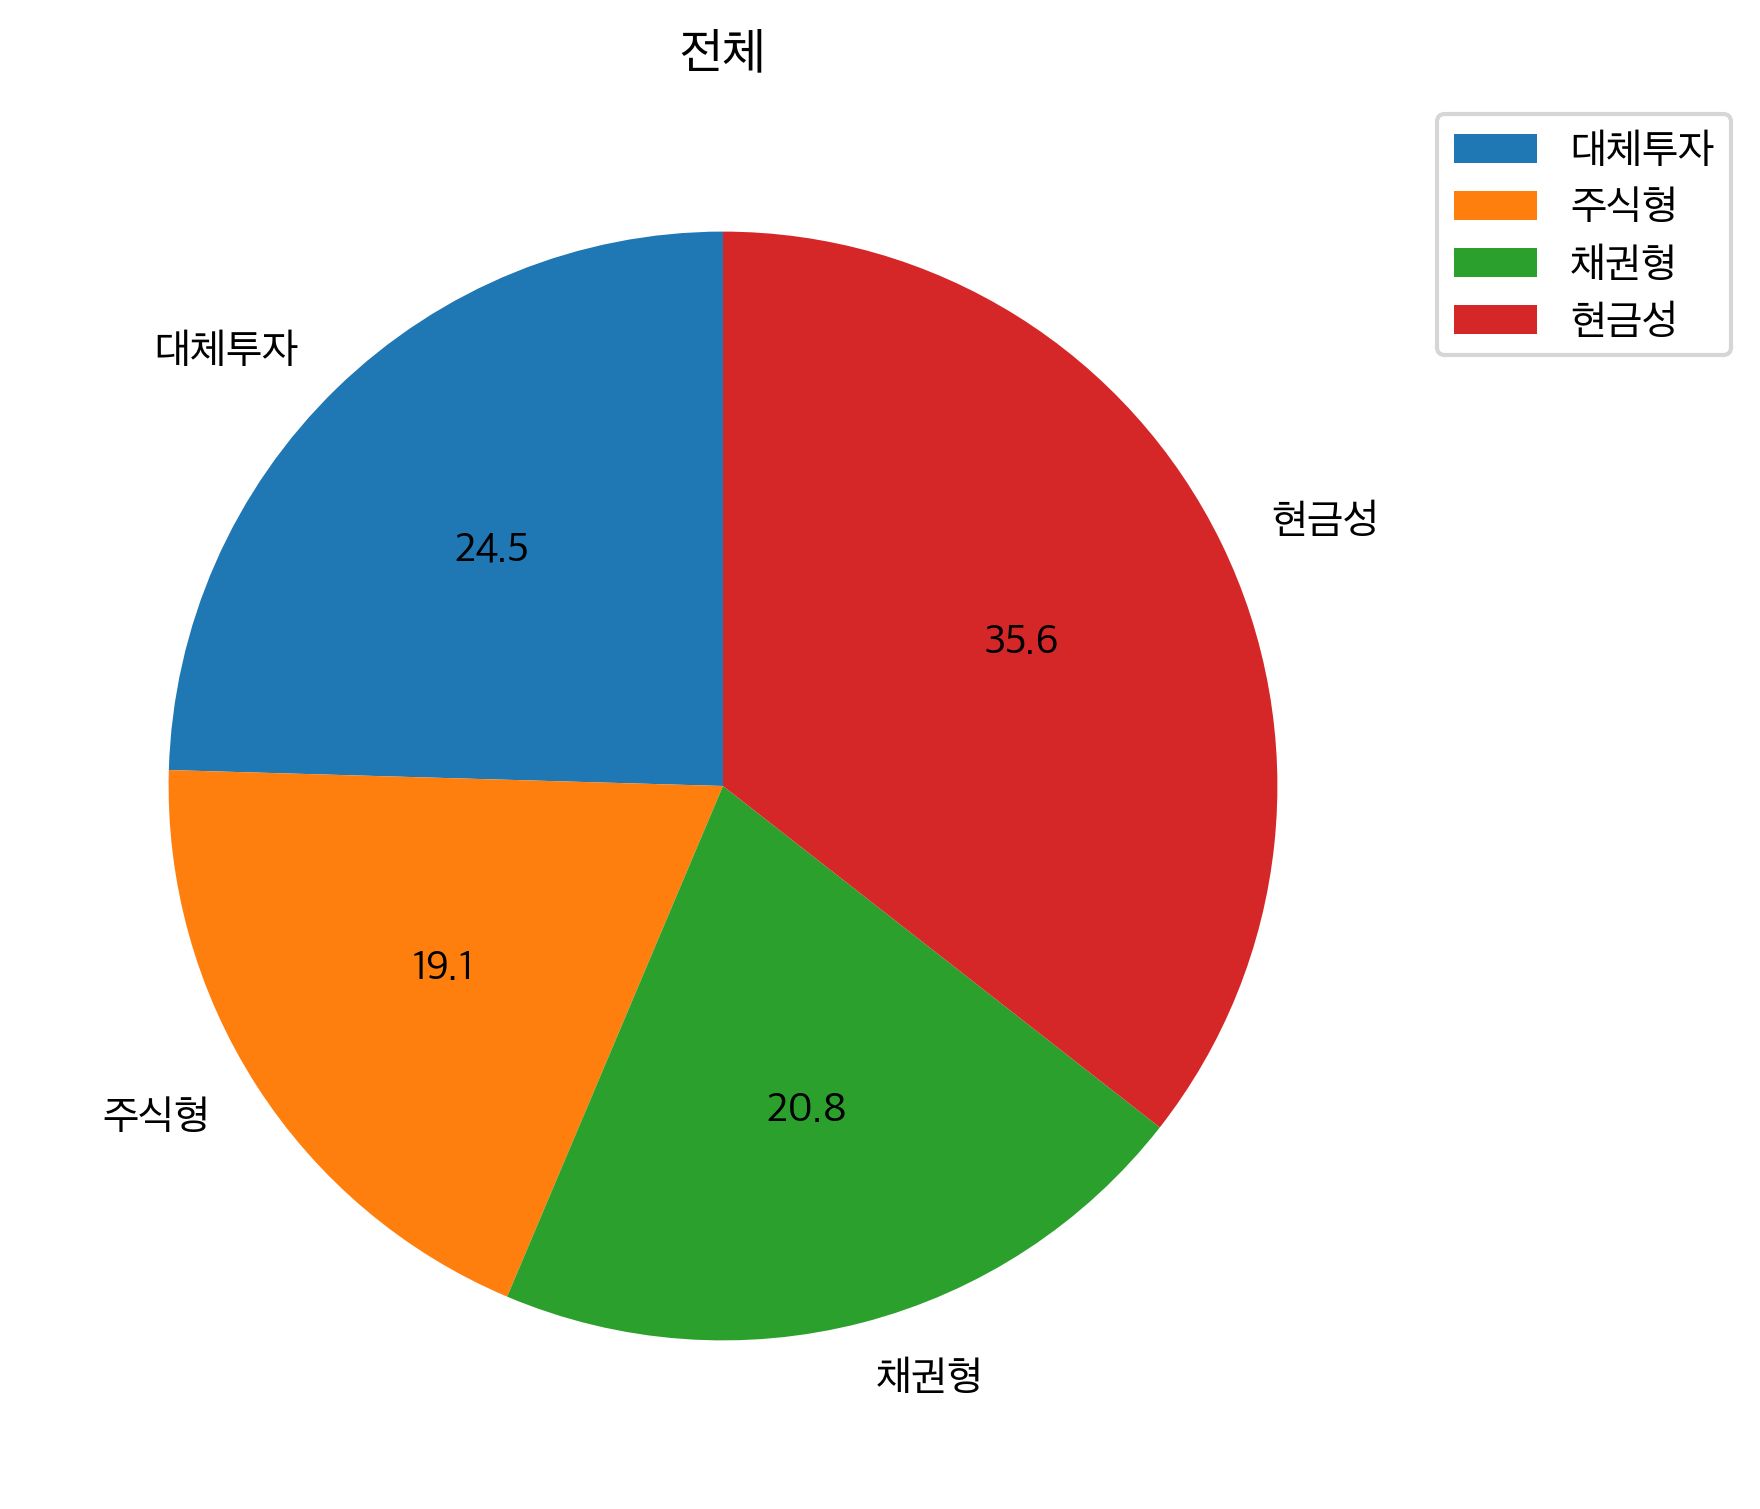

In [334]:
# 카테고리 별 비중 계산
대분류 = result.groupby('대분류').agg({
    '평가금액': 'sum',
    '단가': 'mean',
    '수량': 'sum',
    '매입금액': 'sum',
}).reset_index()

total_amount = 대분류['평가금액'].sum()
대분류['비중'] = 대분류['평가금액'] / total_amount * 100
대분류["수익률"] = (대분류["평가금액"] - 대분류["매입금액"]) / 대분류["매입금액"] * 100
display(대분류)
show_pie(대분류["평가금액"], 대분류["대분류"], "전체", 대분류["대분류"])

,카테고리,평가금액,단가,수량,매입금액,비중,수익률
0,국내주식,3451140,41580.00,83,3409900,2.99,1.21
1,국내채권,7994675,94055.00,85,7785255,6.93,2.69
2,달러헷지,9174810,8805.00,1042,8991845,7.96,2.03
3,달러현금,19644750,33970.00,1283,19625185,17.04,0.10
4,대채투자,19118790,16237.50,1124,18180005,16.58,5.16
5,미국주식,12855990,21110.00,609,12305895,11.15,4.47
6,미국채권,15992020,10740.00,1548,15865493,13.87,0.80
7,원화현금,21349718,27665.50,48053,21322768,18.52,0.13
8,해외주식,5705505,16885.00,387,5744190,4.95,-0.67


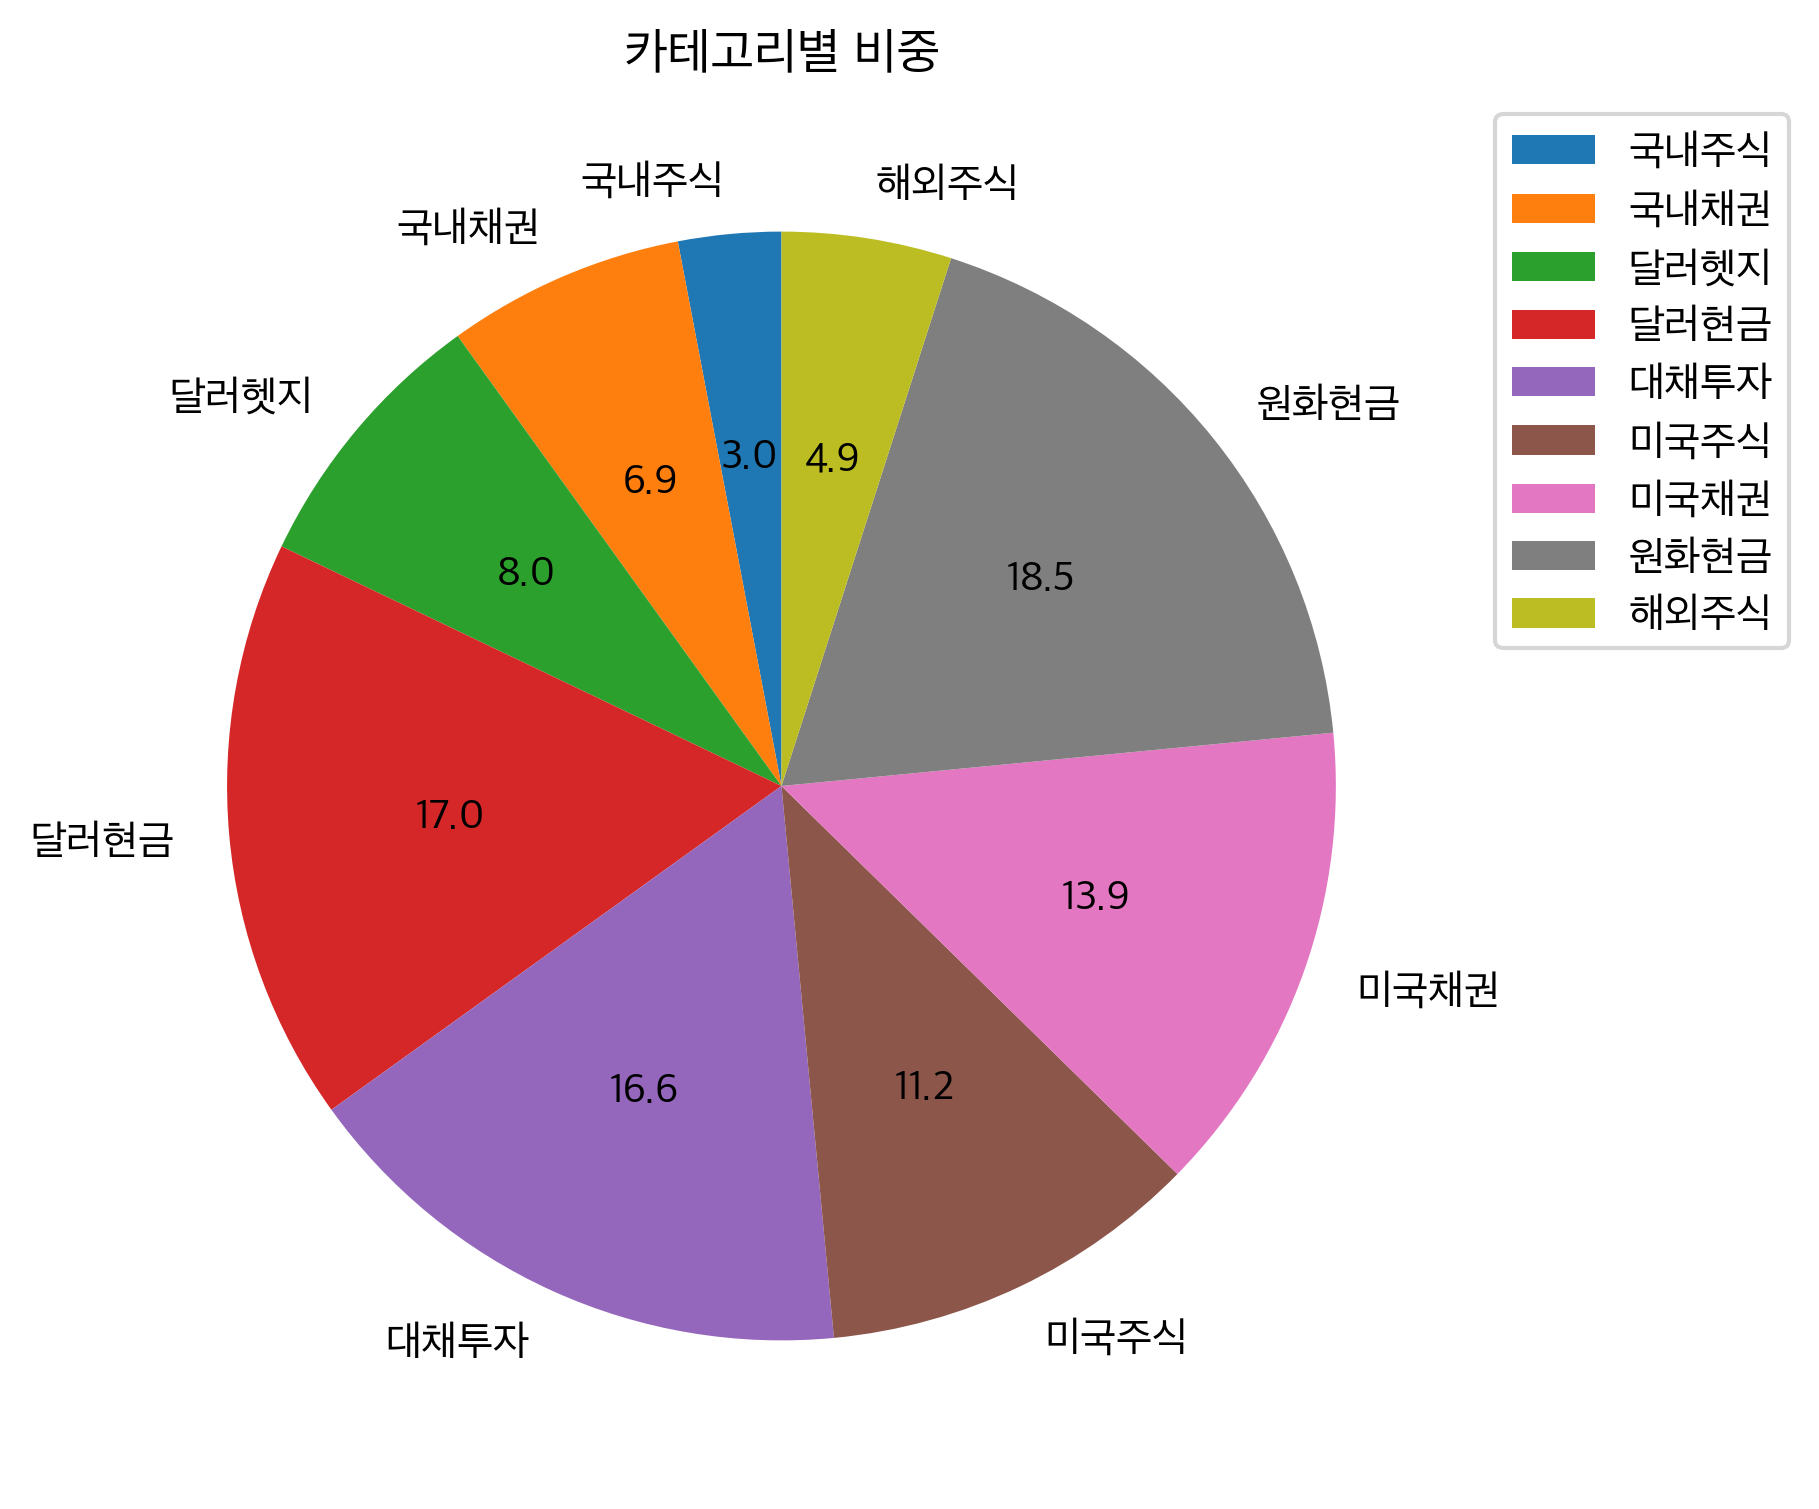

In [335]:
# 카테고리 별 비중 계산
category_group = result.groupby('카테고리').agg({
    '평가금액': 'sum',
    '단가': 'mean',
    '수량': 'sum',
    '매입금액': 'sum',
}).reset_index()

total_amount = category_group['평가금액'].sum()
category_group['비중'] = category_group['평가금액'] / total_amount * 100
category_group["수익률"] = (category_group["평가금액"] - category_group["매입금액"]) / category_group["매입금액"] * 100
display(category_group)
show_pie(category_group["평가금액"], category_group["카테고리"], "카테고리별 비중", category_group["카테고리"])

,대분류,평가금액,단가,수량,매입금액,비중,수익률
0,대체투자,10011810,17085.00,586,9668728,11.42,3.55
1,주식형,18740585,24115.00,924,18634710,21.37,0.57
2,채권형,19855995,38511.67,1213,19533955,22.64,1.65
3,현금성,39097356,30817.75,18411,39050936,44.58,0.12


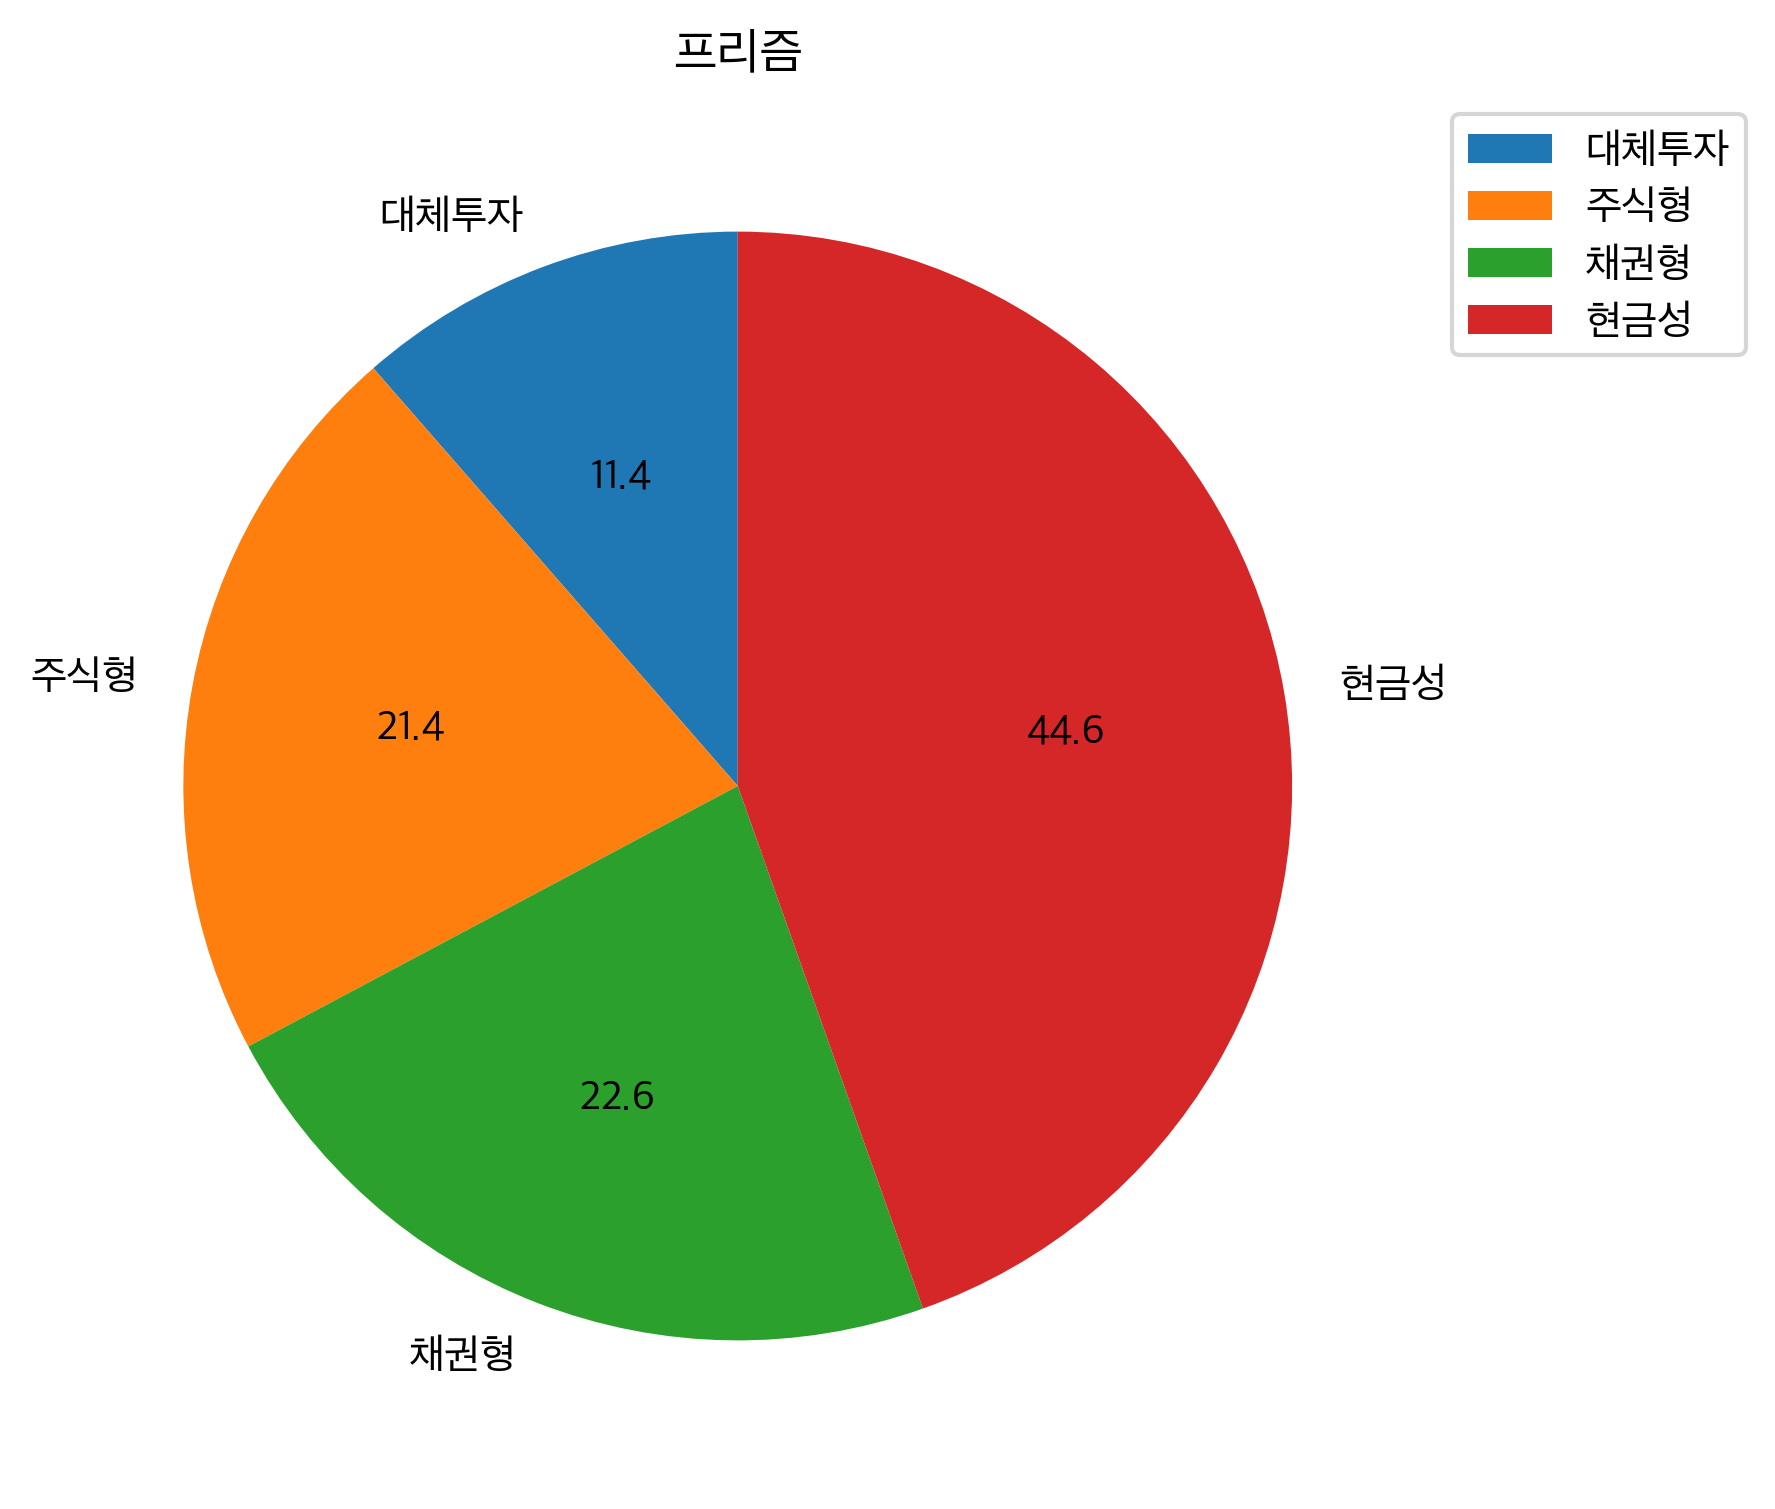

In [336]:
# 카테고리 별 비중 계산
대분류_프리즘 = result_frison.groupby('대분류').agg({
    '평가금액': 'sum',
    '단가': 'mean',
    '수량': 'sum',
    '매입금액': 'sum',
}).reset_index()

대분류_프리즘['비중'] = 대분류_프리즘['평가금액'] / 대분류_프리즘['평가금액'].sum() * 100
대분류_프리즘["수익률"] = (대분류_프리즘["평가금액"] - 대분류_프리즘["매입금액"]) / 대분류_프리즘["매입금액"] * 100
display(대분류_프리즘)
show_pie(대분류_프리즘["평가금액"], 대분류_프리즘["대분류"], "프리즘", 대분류_프리즘["대분류"])

,카테고리,평가금액,단가,수량,매입금액
0,국내주식,3451140,41580.00,83,3409900
1,국내채권,7994675,94055.00,85,7785255
2,달러현금,17778400,33970.00,1120,17758930
3,대채투자,10011810,17085.00,586,9668728
4,미국주식,9583940,21110.00,454,9480620
5,미국채권,11861320,10740.00,1128,11748700
6,원화현금,21318956,27665.50,17291,21292006
7,해외주식,5705505,16885.00,387,5744190


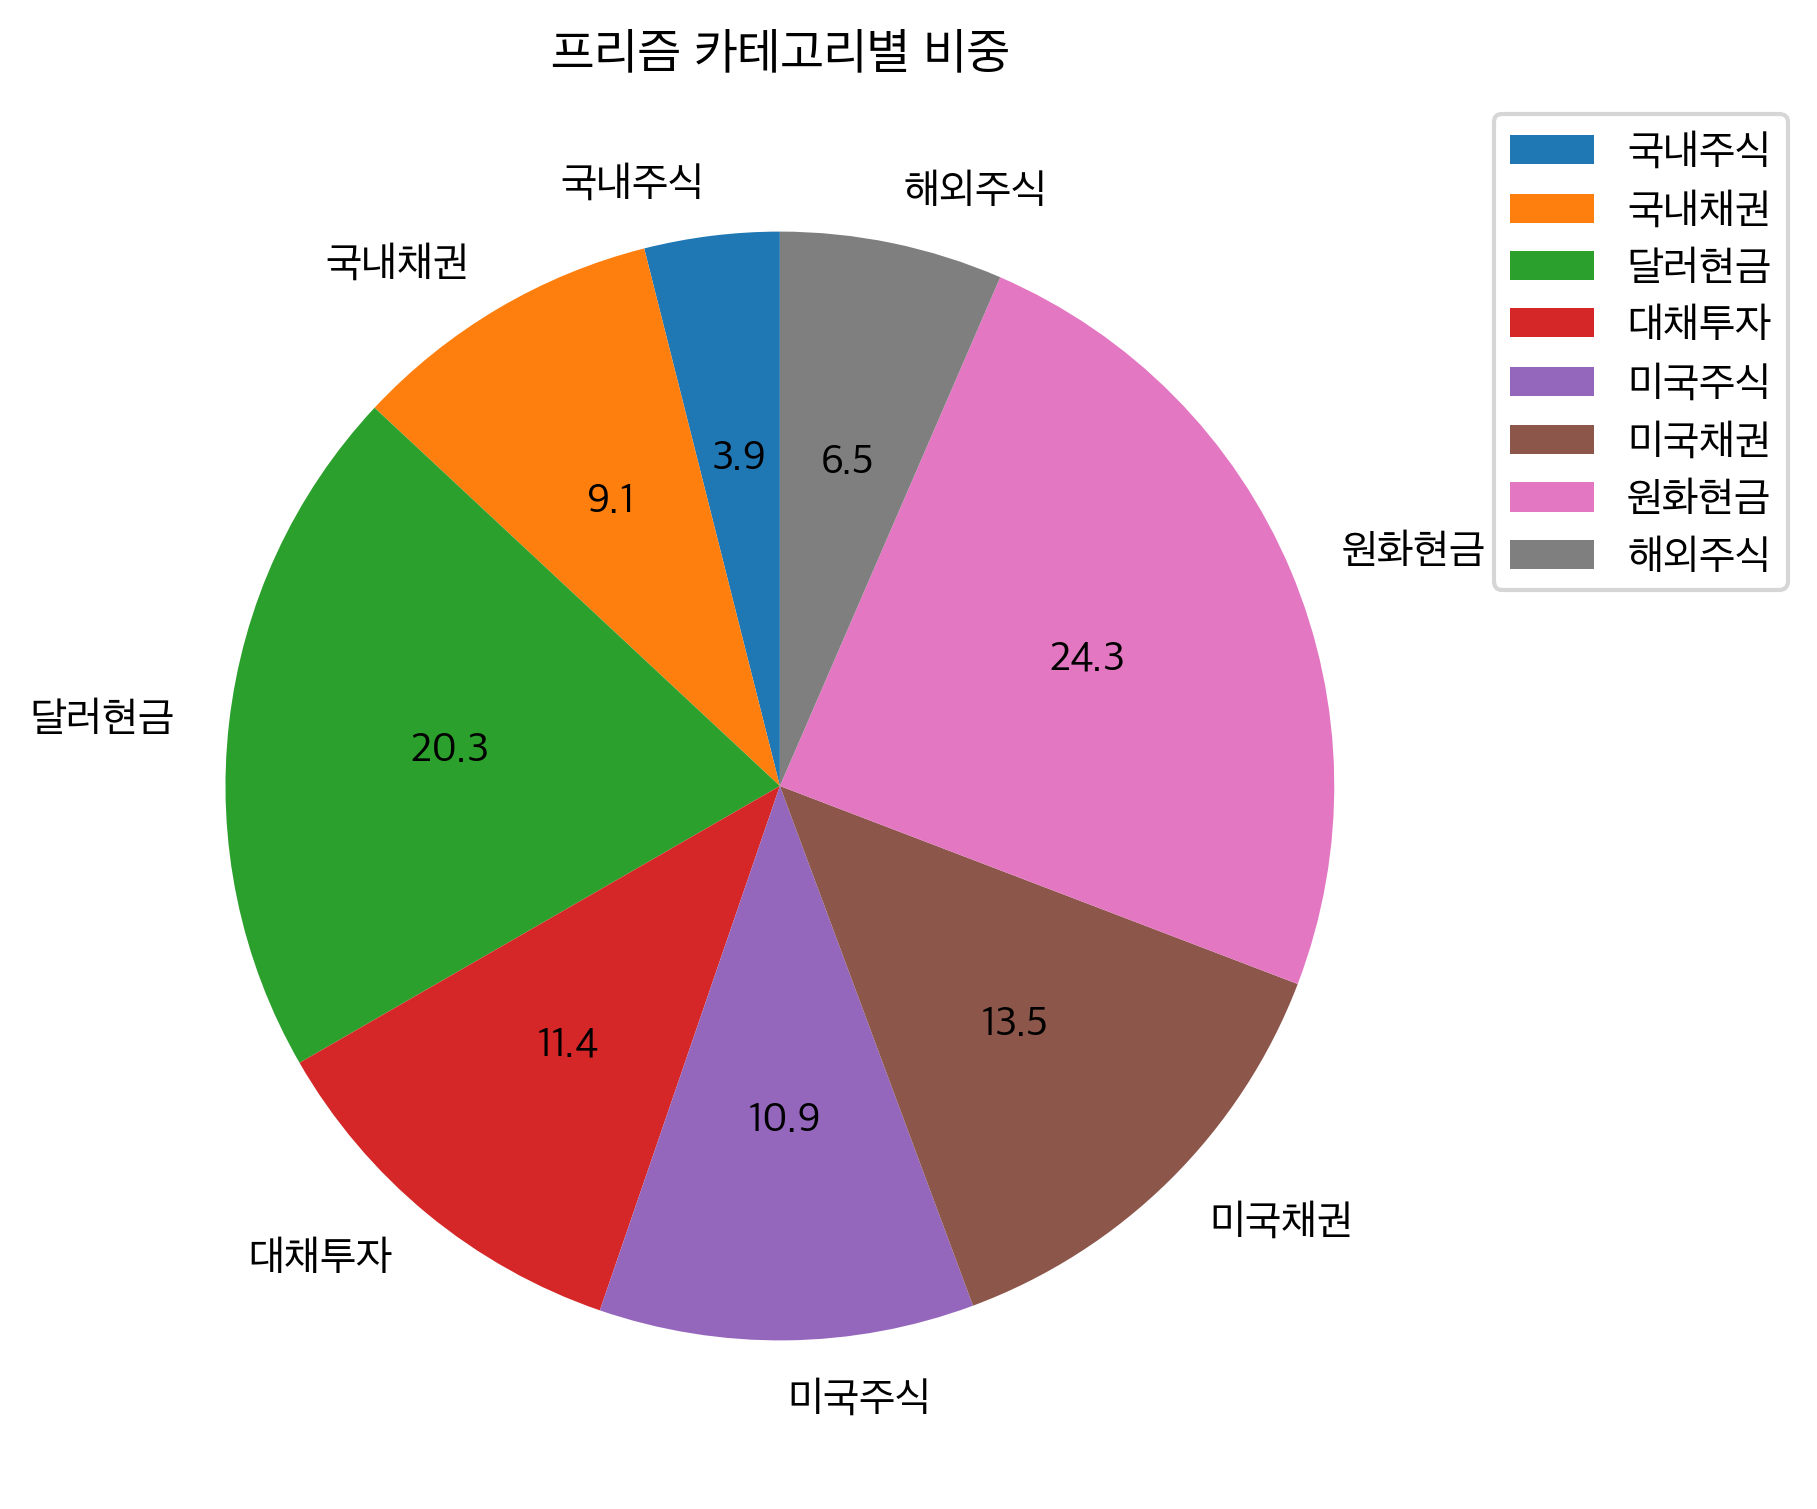

In [337]:
# 카테고리 별 비중 계산
category_group_frison = result_frison.groupby('카테고리').agg({
    '평가금액': 'sum',
    '단가': 'mean',
    '수량': 'sum',
    '매입금액': 'sum',
}).reset_index()

category_group['비중'] = category_group_frison['평가금액'] / category_group_frison['평가금액'].sum() * 100
category_group["수익률"] = (category_group_frison["평가금액"] - category_group_frison["매입금액"]) / category_group_frison["매입금액"] * 100
display(category_group_frison)
show_pie(category_group_frison["평가금액"], category_group_frison["카테고리"], "프리즘 카테고리별 비중", category_group_frison["카테고리"])

,코드,이름,평가금액,단가,수량,매입금액,매입단가,비중,수익률,카테고리,대분류,종류
9,360200,ACE 미국S&P500,12855990,21110.00,609,12305895,19998.27,26.51,4.47,미국주식,주식형,달러자산
13,456610,TIGER 미국달러SOFR금리액티브(합성),6213900,56490.00,110,6217355,56521.41,12.81,-0.06,달러현금,현금성,달러자산
14,456880,ACE 미국달러SOFR금리(합성),13430850,11450.00,1173,13407830,11440.33,27.70,0.17,달러현금,현금성,달러자산
7,308620,KODEX 미국10년국채선물,4937480,11645.00,424,4875895,11499.75,10.18,1.26,미국채권,채권형,달러자산
15,473330,SOL 미국30년국채커버드콜(합성),11054540,9835.00,1124,10989598,9783.59,22.80,0.59,미국채권,채권형,달러자산


,코드,이름,평가금액,단가,수량,매입금액,매입단가,비중,수익률,카테고리,대분류,종류
1,218420,KODEX 미국S&P500에너지(합성),769500,15390.00,50,654832,13096.64,1.15,17.51,대채투자,대체투자,비달러자산
11,411060,ACE KRX금현물,18349290,17085.00,1074,17525173,16323.97,27.47,4.70,대채투자,대체투자,비달러자산
5,292560,TIGER 일본엔선물,9174810,8805.00,1042,8991845,8629.41,13.74,2.03,달러헷지,대체투자,비달러자산
2,241180,TIGER 일본니케이225,2184330,21415.00,102,2144035,21025.30,3.27,1.88,해외주식,주식형,비달러자산
4,283580,KODEX 차이나CSI300,3521175,12355.00,285,3600155,12632.44,5.27,-2.19,해외주식,주식형,비달러자산
6,294400,KOSEF 200TR,3451140,41580.00,83,3409900,41095.59,5.17,1.21,국내주식,주식형,비달러자산
0,0,현금,47668,1.00,47668,47668,1.00,0.07,0.00,원화현금,현금성,비달러자산
8,357870,TIGER CD금리투자KIS(합성),21302050,55330.00,385,21275100,55260.00,31.89,0.13,원화현금,현금성,비달러자산
10,365780,ACE 국고채10년,7994675,94055.00,85,7785255,91591.33,11.97,2.69,국내채권,채권형,비달러자산


48492760

66794638

,종류,평가금액
0,달러자산,48492760
1,비달러자산,66794638


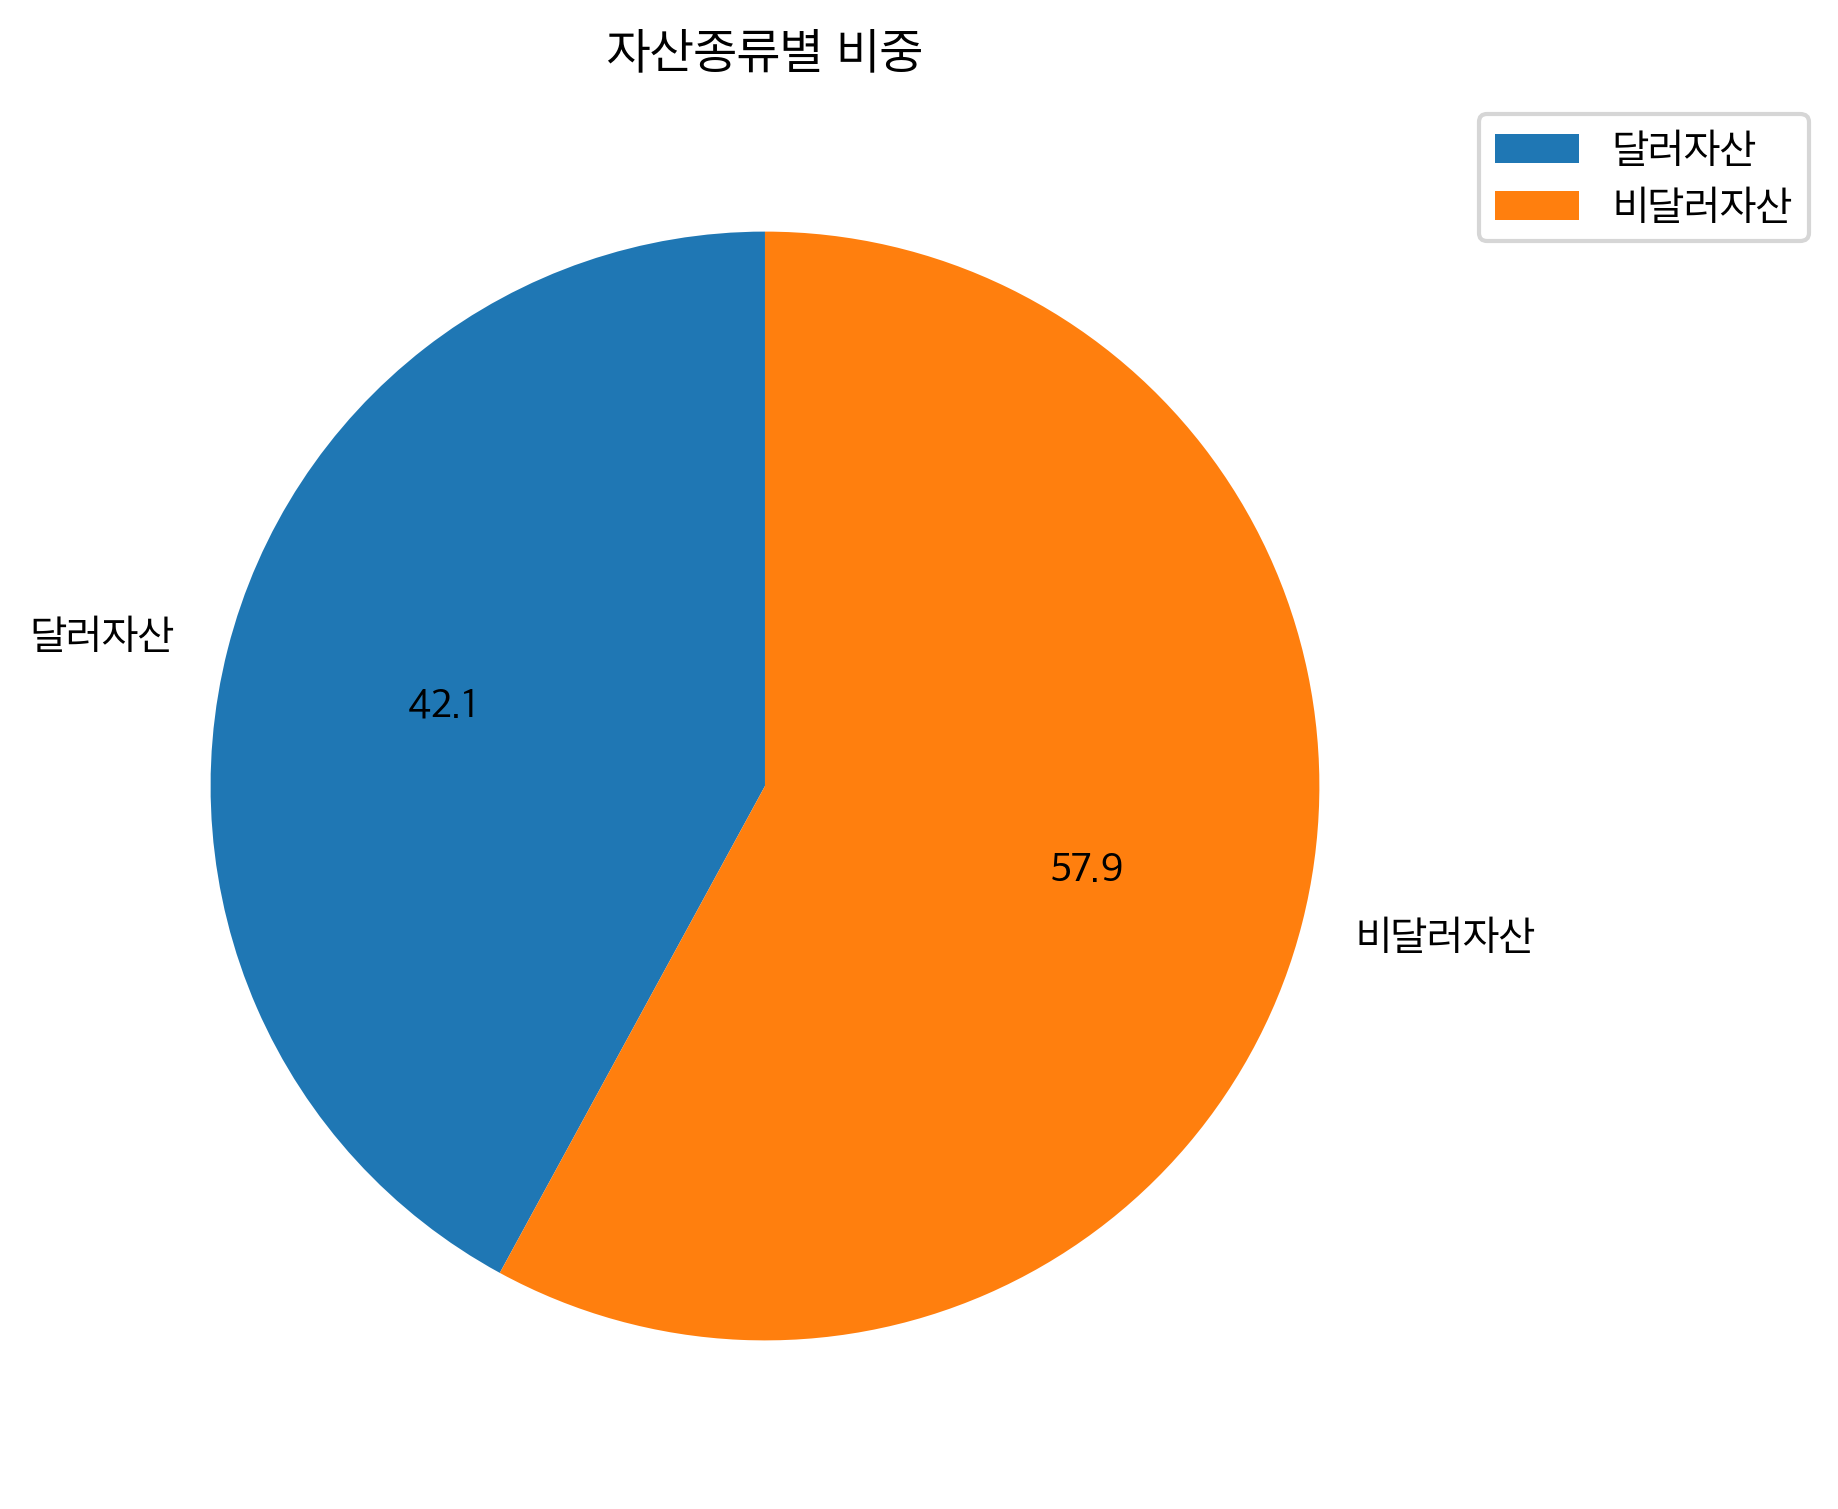

In [338]:
# '대분류'가 '채권'인 항목 필터링
# 달러_df = result[result['카테고리'] == '대채투자' | 
#                  (result['카테고리'] == '미국주식') | 
#                  (result['카테고리'] == '해외주식') |
#                  (result['카테고리'] == '미국채권') ]

달러_df = pd.concat([result[result['카테고리'] == '미국주식'],
                    result[result['카테고리'] == '달러현금'],
                    result[result['카테고리'] == '미국채권']])
원화_df = pd.concat([result[result['카테고리'] == '국내주식'],
                    result[result['카테고리'] == '원화현금'],
                    result[result['카테고리'] == '국내채권']])
대채투자_df = result[result['카테고리'] == '대채투자']
달러인버스_df = result[result['카테고리'] == '달러헷지']
해외주식_df = result[result['카테고리'] == '해외주식']

달러헷지_df = pd.concat([대채투자_df, 달러인버스_df, 해외주식_df, 원화_df])

# 총 평가금액 계산
total_달러_amount = 달러_df['평가금액'].sum()
total_달러헷지_amount = 달러헷지_df['평가금액'].sum()

# 각각의 항목에 대해 비중 계산
달러_df.loc[:, '비중'] = 달러_df['평가금액'] / total_달러_amount * 100
달러헷지_df.loc[:, '비중'] = 달러헷지_df['평가금액'] / total_달러헷지_amount * 100
달러_df['종류'] = '달러자산'
달러헷지_df['종류'] = '비달러자산'

display(달러_df)
display(달러헷지_df)
display(total_달러_amount)
display(total_달러헷지_amount)
자산종류 = pd.concat([달러_df, 달러헷지_df])
자산종류 = 자산종류.groupby('종류').agg({
    '평가금액': 'sum',
}).reset_index()
display(자산종류)
show_pie(자산종류["평가금액"], 자산종류["종류"], "자산종류별 비중", 자산종류["종류"])

In [339]:
# '대분류'가 '채권'인 항목 필터링
bond_df = result[result['대분류'].str.contains('채권')]

# 총 평가금액 계산
total_bond_amount = bond_df['평가금액'].sum()

# 각각의 항목에 대해 비중 계산
bond_df.loc[:, '비중'] = bond_df['평가금액'] / total_bond_amount * 100
display(bond_df)
total_bond_amount

,코드,이름,평가금액,단가,수량,매입금액,매입단가,비중,수익률,카테고리,대분류
7,308620,KODEX 미국10년국채선물,4937480,11645.00,424,4875895,11499.75,20.58,1.26,미국채권,채권형
10,365780,ACE 국고채10년,7994675,94055.00,85,7785255,91591.33,33.33,2.69,국내채권,채권형
15,473330,SOL 미국30년국채커버드콜(합성),11054540,9835.00,1124,10989598,9783.59,46.09,0.59,미국채권,채권형


23986695

In [340]:
# '대분류'가 '주식'인 항목 필터링
stock_df = result[result['대분류'] == '주식']

# 총 평가금액 계산
total_stock_amount = stock_df['평가금액'].sum()

# 각각의 항목에 대해 비중 계산
stock_df.loc[:, '비중'] = stock_df['평가금액'] / total_stock_amount * 100
stock_df

,코드,이름,평가금액,단가,수량,매입금액,매입단가,비중,수익률,카테고리,대분류


# 현금성

,코드,이름,평가금액,단가,수량,매입금액,매입단가,비중,수익률,카테고리,대분류
0,0,현금,47668,1.00,47668,47668,1.00,0.12,0.00,원화현금,현금성
8,357870,TIGER CD금리투자KIS(합성),21302050,55330.00,385,21275100,55260.00,51.96,0.13,원화현금,현금성
13,456610,TIGER 미국달러SOFR금리액티브(합성),6213900,56490.00,110,6217355,56521.41,15.16,-0.06,달러현금,현금성
14,456880,ACE 미국달러SOFR금리(합성),13430850,11450.00,1173,13407830,11440.33,32.76,0.17,달러현금,현금성


40994468

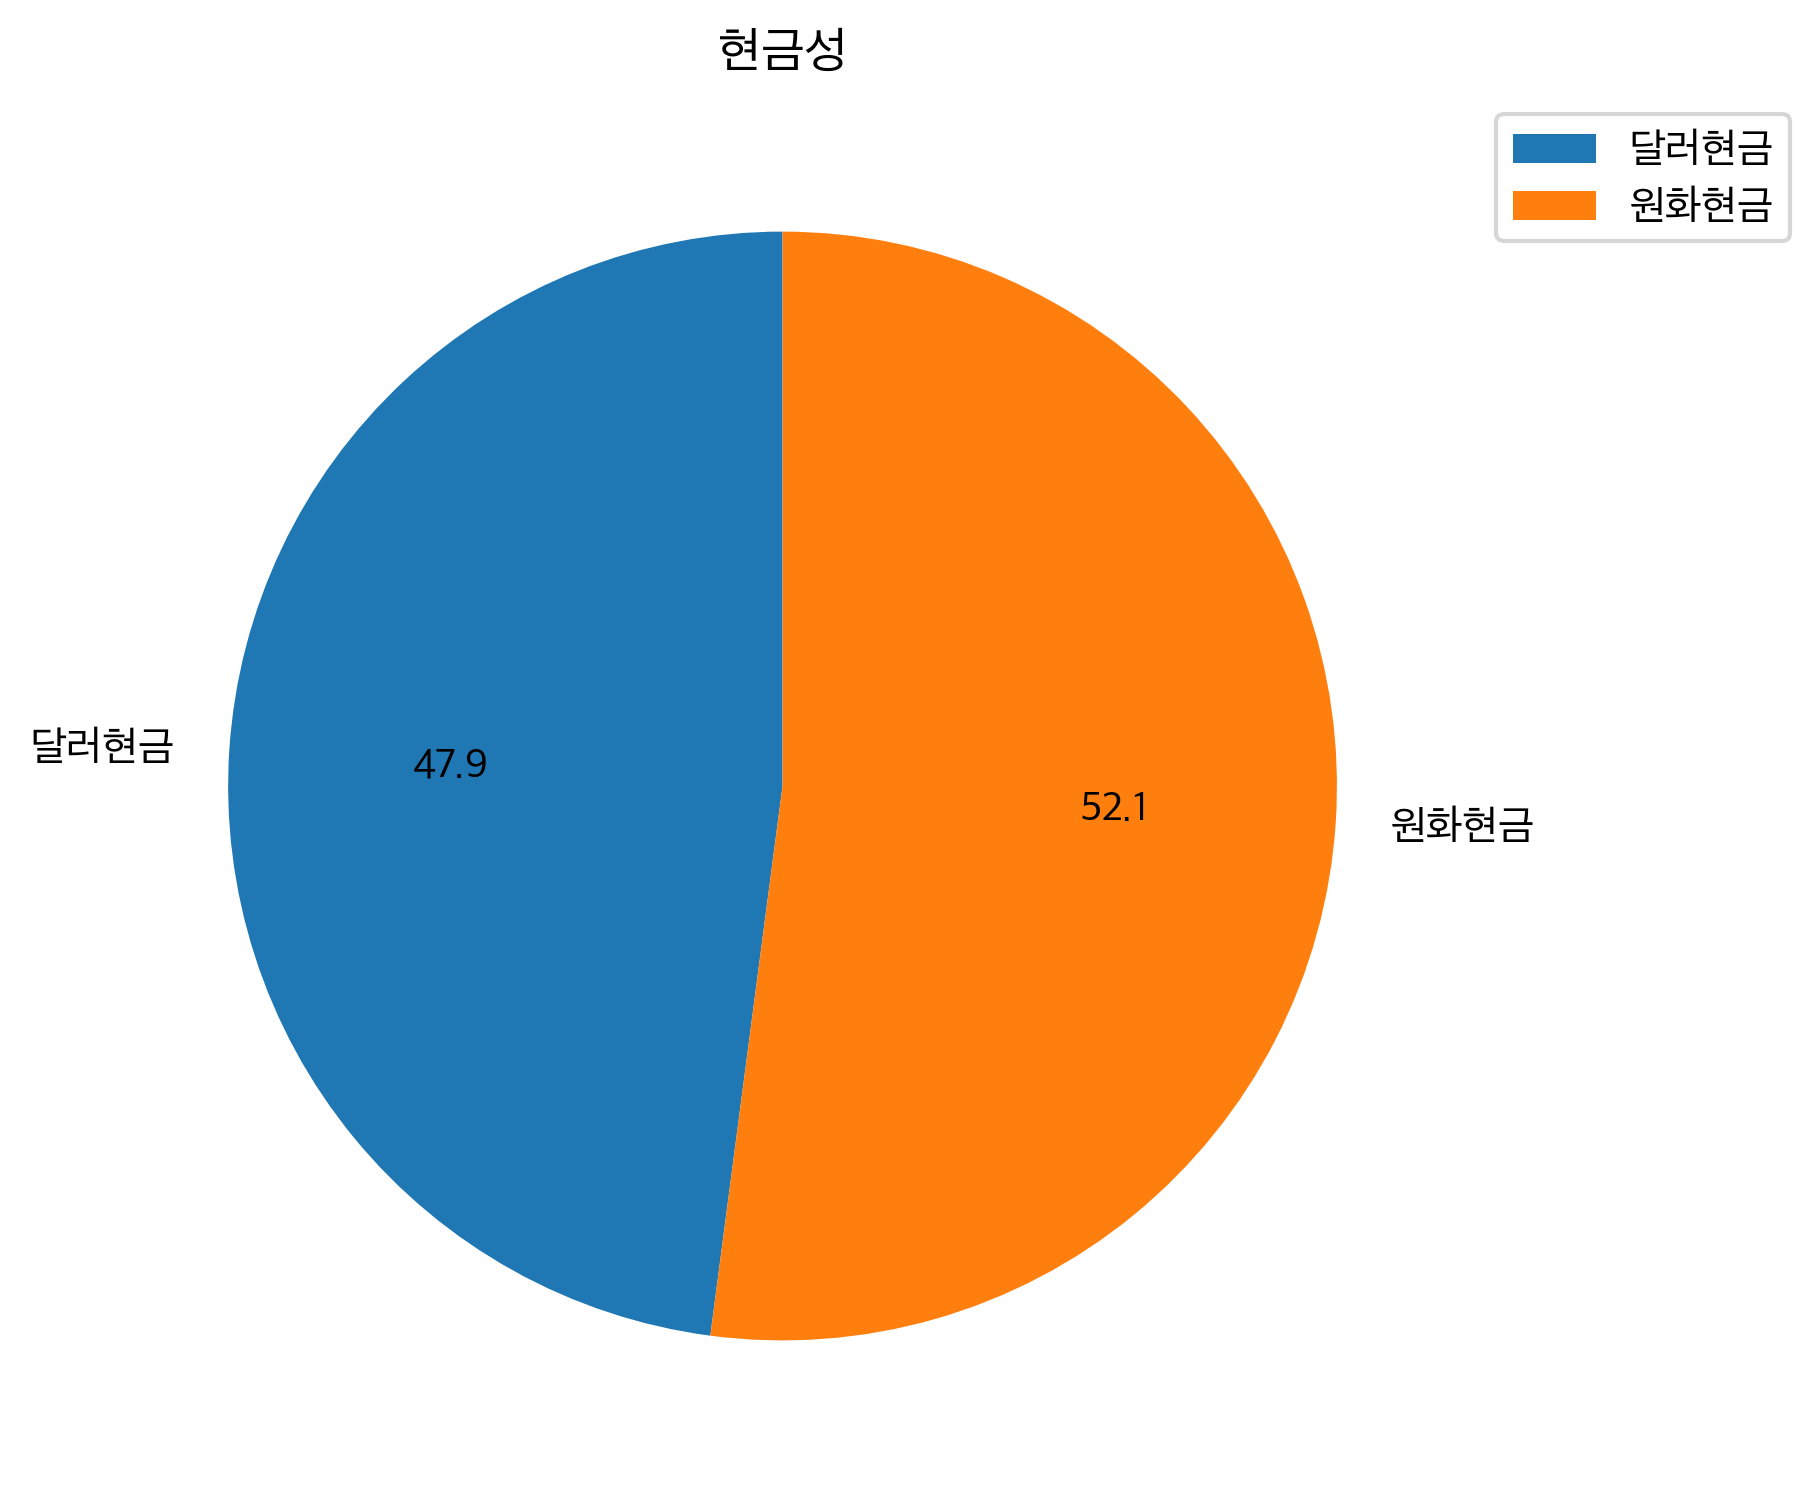

In [341]:
# '대분류'가 '현금'인 항목 필터링
cash_df = result[result['대분류'].str.contains('현금')]

# 총 평가금액 계산
total_cash_amount = cash_df['평가금액'].sum()

# 각각의 항목에 대해 비중 계산
cash_df.loc[:, '비중'] = cash_df['평가금액'] / total_cash_amount * 100
display(cash_df)
display(total_cash_amount)

# 카테고리 별 비중 계산
cash_group = cash_df.groupby('카테고리').agg({
    '평가금액': 'sum',
    '단가': 'mean',
    '수량': 'sum',
    '매입금액': 'sum',
}).reset_index()
show_pie(cash_group["평가금액"], cash_group["카테고리"], "현금성", cash_group["카테고리"])


## 총자산 비중

In [342]:
show_pie(대분류['비중'], 대분류['대분류'], '총자산')

TypeError: show_pie() missing 1 required positional argument: 'legend'